# TIME SERIES MODELS

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-Libraries" data-toc-modified-id="1-Libraries-1">1 Libraries</a></span></li><li><span><a href="#2-Parameters" data-toc-modified-id="2-Parameters-2">2 Parameters</a></span></li><li><span><a href="#3-Import" data-toc-modified-id="3-Import-3">3 Import</a></span></li><li><span><a href="#4-Stationarity" data-toc-modified-id="4-Stationarity-4">4 Stationarity</a></span><ul class="toc-item"><li><span><a href="#4.1-Augemented-Dickey-Fuller-Test" data-toc-modified-id="4.1-Augemented-Dickey-Fuller-Test-4.1">4.1 Augemented Dickey-Fuller Test</a></span></li><li><span><a href="#4.2-Original-Series" data-toc-modified-id="4.2-Original-Series-4.2">4.2 Original Series</a></span></li><li><span><a href="#4.3-First-Differenced-Series" data-toc-modified-id="4.3-First-Differenced-Series-4.3">4.3 First Differenced Series</a></span></li><li><span><a href="#4.4-Fractional-Differenced-Series" data-toc-modified-id="4.4-Fractional-Differenced-Series-4.4">4.4 Fractional Differenced Series</a></span></li></ul></li><li><span><a href="#5-Causality" data-toc-modified-id="5-Causality-5">5 Causality</a></span><ul class="toc-item"><li><span><a href="#5.1-Granger-Causality-Test" data-toc-modified-id="5.1-Granger-Causality-Test-5.1">5.1 Granger-Causality Test</a></span></li><li><span><a href="#5.2-Original-Series" data-toc-modified-id="5.2-Original-Series-5.2">5.2 Original Series</a></span></li></ul></li><li><span><a href="#6-Model" data-toc-modified-id="6-Model-6">6 Model</a></span><ul class="toc-item"><li><span><a href="#6.1-Train-Test-Yields" data-toc-modified-id="6.1-Train-Test-Yields-6.1">6.1 Train-Test Yields</a></span></li><li><span><a href="#6.2-Train-Test-Scores" data-toc-modified-id="6.2-Train-Test-Scores-6.2">6.2 Train-Test Scores</a></span></li><li><span><a href="#6.3-AR-Model" data-toc-modified-id="6.3-AR-Model-6.3">6.3 AR-Model</a></span></li><li><span><a href="#6.4-VAR-Model" data-toc-modified-id="6.4-VAR-Model-6.4">6.4 VAR-Model</a></span></li></ul></li><li><span><a href="#7-Back-Transform" data-toc-modified-id="7-Back-Transform-7">7 Back-Transform</a></span><ul class="toc-item"><li><span><a href="#7.1-PC-Scores" data-toc-modified-id="7.1-PC-Scores-7.1">7.1 PC-Scores</a></span></li><li><span><a href="#7.2-Spot-Rates" data-toc-modified-id="7.2-Spot-Rates-7.2">7.2 Spot Rates</a></span></li><li><span><a href="#7.3-Naive-Model" data-toc-modified-id="7.3-Naive-Model-7.3">7.3 Naive Model</a></span></li></ul></li><li><span><a href="#8-Model-Evaluation" data-toc-modified-id="8-Model-Evaluation-8">8 Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#8.1-Results" data-toc-modified-id="8.1-Results-8.1">8.1 Results</a></span></li><li><span><a href="#8.2-Error" data-toc-modified-id="8.2-Error-8.2">8.2 Error</a></span></li></ul></li><li><span><a href="#9-Visualization" data-toc-modified-id="9-Visualization-9">9 Visualization</a></span><ul class="toc-item"><li><span><a href="#9.1-PC-Scores" data-toc-modified-id="9.1-PC-Scores-9.1">9.1 PC-Scores</a></span></li><li><span><a href="#9.2-Spot-Rates" data-toc-modified-id="9.2-Spot-Rates-9.2">9.2 Spot Rates</a></span></li></ul></li></ul></div>

### 1 Libraries
***

In [1]:
# Data handling
import pandas as pd
import numpy as np
import datetime
import warnings
from sklearn.preprocessing import StandardScaler

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:,.6f}'.format
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import statsmodels.api as sm
import ipywidgets as widgets

# Autocorrelation
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Stationarity & causality
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

# Model & evaluation
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.ar_model import AR

# Random Walk
from random import seed
from random import random
from random import gauss

In [3]:
# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.pyplot import cm
import seaborn as sns

%config InlineBackend.figure_format ="retina"

# Date formats
years  = mdates.YearLocator()
months = mdates.MonthLocator()

years_fmt  = mdates.DateFormatter("%Y")
months_fmt = mdates.DateFormatter("%Y-%m")
days_fmt   = mdates.DateFormatter("%Y-%m-%d")

### 2 Parameters
***

In [4]:
# Widget for yield curve date frequency
widget_freq = widgets.Dropdown(options=["day","week","month"],
                               value="day",
                               description="Frequency:",
                               disabled=False)

# Widget if time series shall be differenced
widget_diff = widgets.Dropdown(options=["no","yes"],
                               value="yes",
                               description="Differencing:",
                               disabled=False)


display (widget_freq)
display (widget_diff)

Dropdown(description='Frequency:', options=('day', 'week', 'month'), value='day')

Dropdown(description='Differencing:', index=1, options=('no', 'yes'), value='yes')

In [5]:
# Widget for type of model
widget_model = widgets.Dropdown(options=["ar","var"],
                                value="ar",
                                description="Model:",
                                disabled=False)

# Widget for number of lags in model
widget_lag = widgets.IntSlider(value=5, min=1, max=10, step=1,
                               description="Lags:",
                               disabled=False,
                               continuous_update=False,
                               orientation="horizontal",
                               readout=True,
                               readout_format="d")

display (widget_model)
display (widget_lag)

Dropdown(description='Model:', options=('ar', 'var'), value='ar')

IntSlider(value=5, continuous_update=False, description='Lags:', max=10, min=1)

In [7]:
freq  = widget_freq.value
diff  = widget_diff.value
model = widget_model.value
lag   = widget_lag.value

In [8]:
# Prediction
pred_start = "2017-01-01"
steps = 5

### 3 Import
***

In [9]:
# File paths
filepath_spot = "../assets/files/02-clean/"
filepath_pca  = "../assets/files/03-pca/"

# Filenames
filename_T_k = "T_k_"+str(freq)+".csv"
filename_W_k = "W_k_inv_"+str(freq)+".csv"
filename_X_k = "X_k_"+str(freq)+".csv"

filename_spot = "spot_"+str(freq)+".csv"
filename_tenors = "tenors.csv"

In [10]:
# Import
W_k_inv = pd.read_csv(filepath_pca + filename_W_k, index_col = 0)   # PC-loadings
T_k     = pd.read_csv(filepath_pca + filename_T_k, index_col = 0)   # PC-scores
X_k     = pd.read_csv(filepath_pca + filename_X_k, index_col = 0)   # Model spot rates
spot    = pd.read_csv(filepath_spot + filename_spot, index_col = 0) # Actual spot rates
tenors  = pd.read_csv(filepath_spot + "tenors.csv", index_col = 0)  # List of selected tenors

# Columns
W_k_inv.columns.name = "W_k_inv_"+str(freq)
T_k.columns.name     = "T_k_"+str(freq)
X_k.columns.name     = "X_k_"+str(freq)
spot.columns.name    = "Spot_"+str(freq)
tenors.columns.name  = "tenors"

# Index
T_k.index  = pd.to_datetime(T_k.index)
X_k.index  = pd.to_datetime(X_k.index)
spot.index = pd.to_datetime(spot.index)

In [11]:
# Column names
cols      = W_k_inv.T.columns
cols_diff = cols+"_diff"
cols_cum  = cols+"_cum"
cols_frac = cols+"_frac"
cols_len  = len(cols)

### 4 Stationarity
***

#### 4.1 Augemented Dickey-Fuller Test

The Augmented Dickey-Fuller (ADF) test can be applied, to statistically testify stationarity. The ADF basically just regresses the first differences (= Y-variable) on the original time series (= X-variable). The corresponding t-statistic gives the ADF-statistic. 
- <b>Non-Stationary:</b> If the original time series cannot signficantly help to predict the first differences, the original time series is non-stationary. 
- <b>Stationary:</b> A perfect stationary time series would be mean-reverting immediately, and thus the original time series would be able to predict the next change.

In [12]:
def ad_fuller(df, cols, confidence = "5%"):
    """
    This function applies the ADF-test for a respective time series at a certain confidence interval
    Parameters required:
    - Data frame under inspection
    - Column of time series in data frame
    - Confidence interval
    """
    
    adf_stat, threshold, p_val, stationary = list(), list(), list(), list() 

    for i in cols:
        model = adfuller(df[i])   
        
        adf_stat.append(model[0])
        threshold.append(model[4][confidence])
        p_val.append(model[1])
           
        if model[0] < model[4][confidence]: x = "stat"
        else: x = "non-stat"         
        stationary.append(x)

    eval_df = pd.DataFrame(np.zeros([len(cols),0]), index = cols)
    
    eval_df["adf_stat"] = adf_stat
    eval_df["p_val"] = p_val
    eval_df["result"] = stationary
    eval_df["crit_"+confidence] = model[4][confidence]
             
    return eval_df

#### 4.2 Original Series

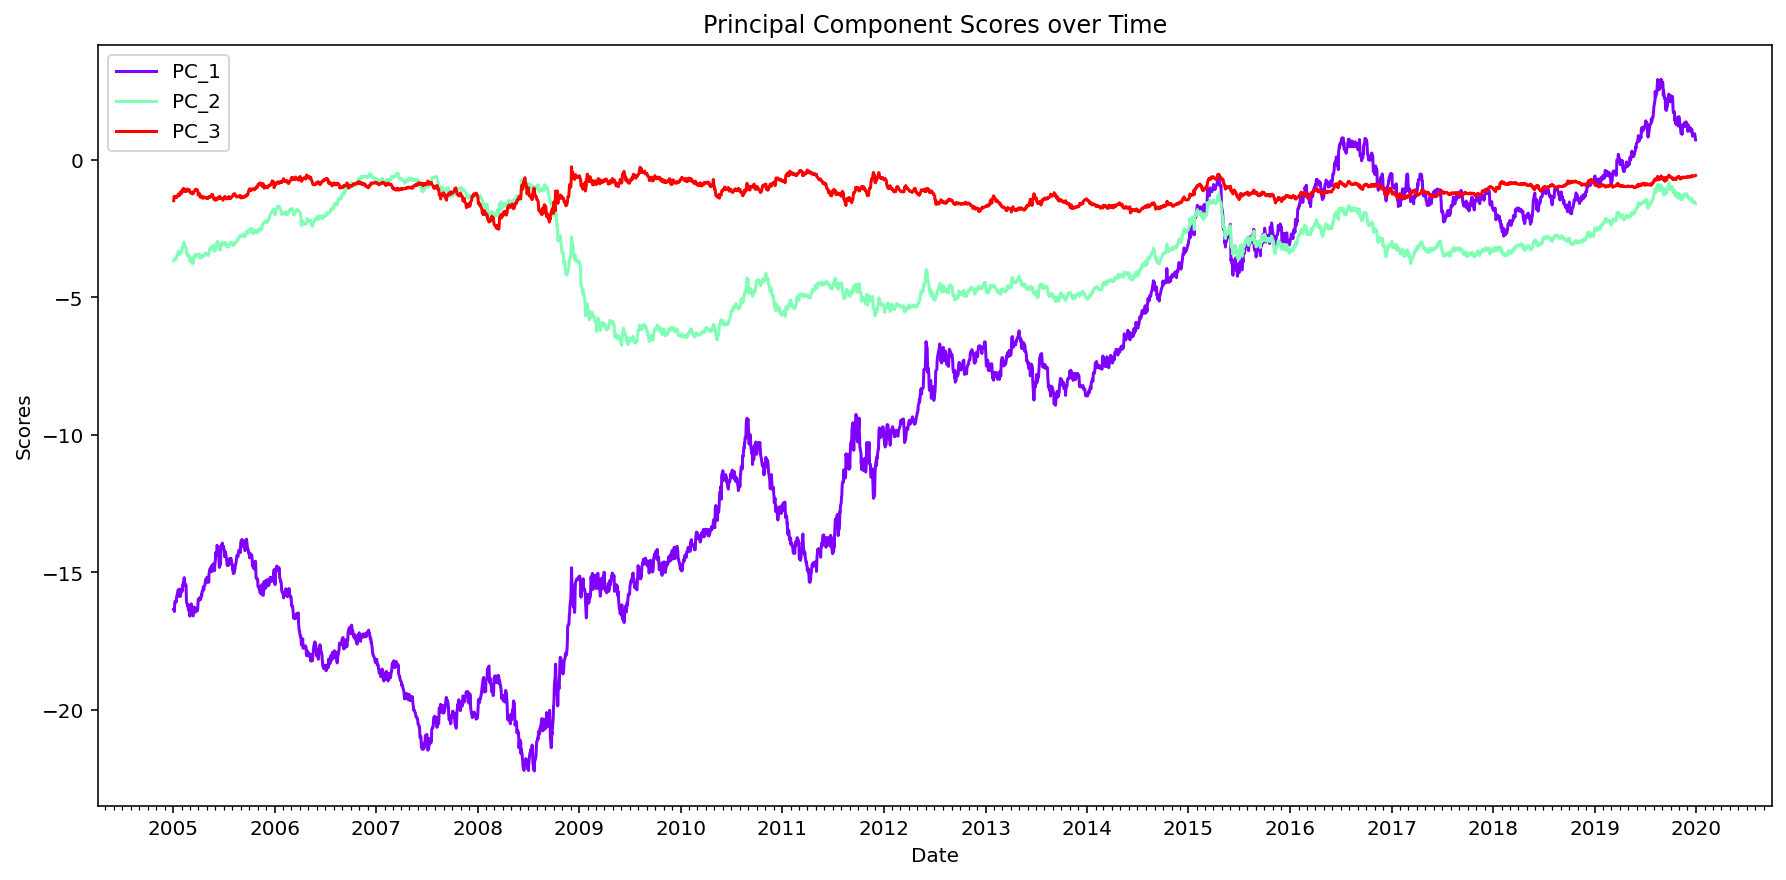

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (15,7))
color = cm.rainbow(np.linspace(0,1,cols_len))

for i,c in zip(cols,color):
    plt.plot(T_k[i], c = c, label = i)

# Format axis
ax.set_title ("Principal Component Scores over Time")
ax.set_xlabel ("Date")
ax.set_ylabel ("Scores")

# Format ticks
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)

ax.legend()
plt.show()

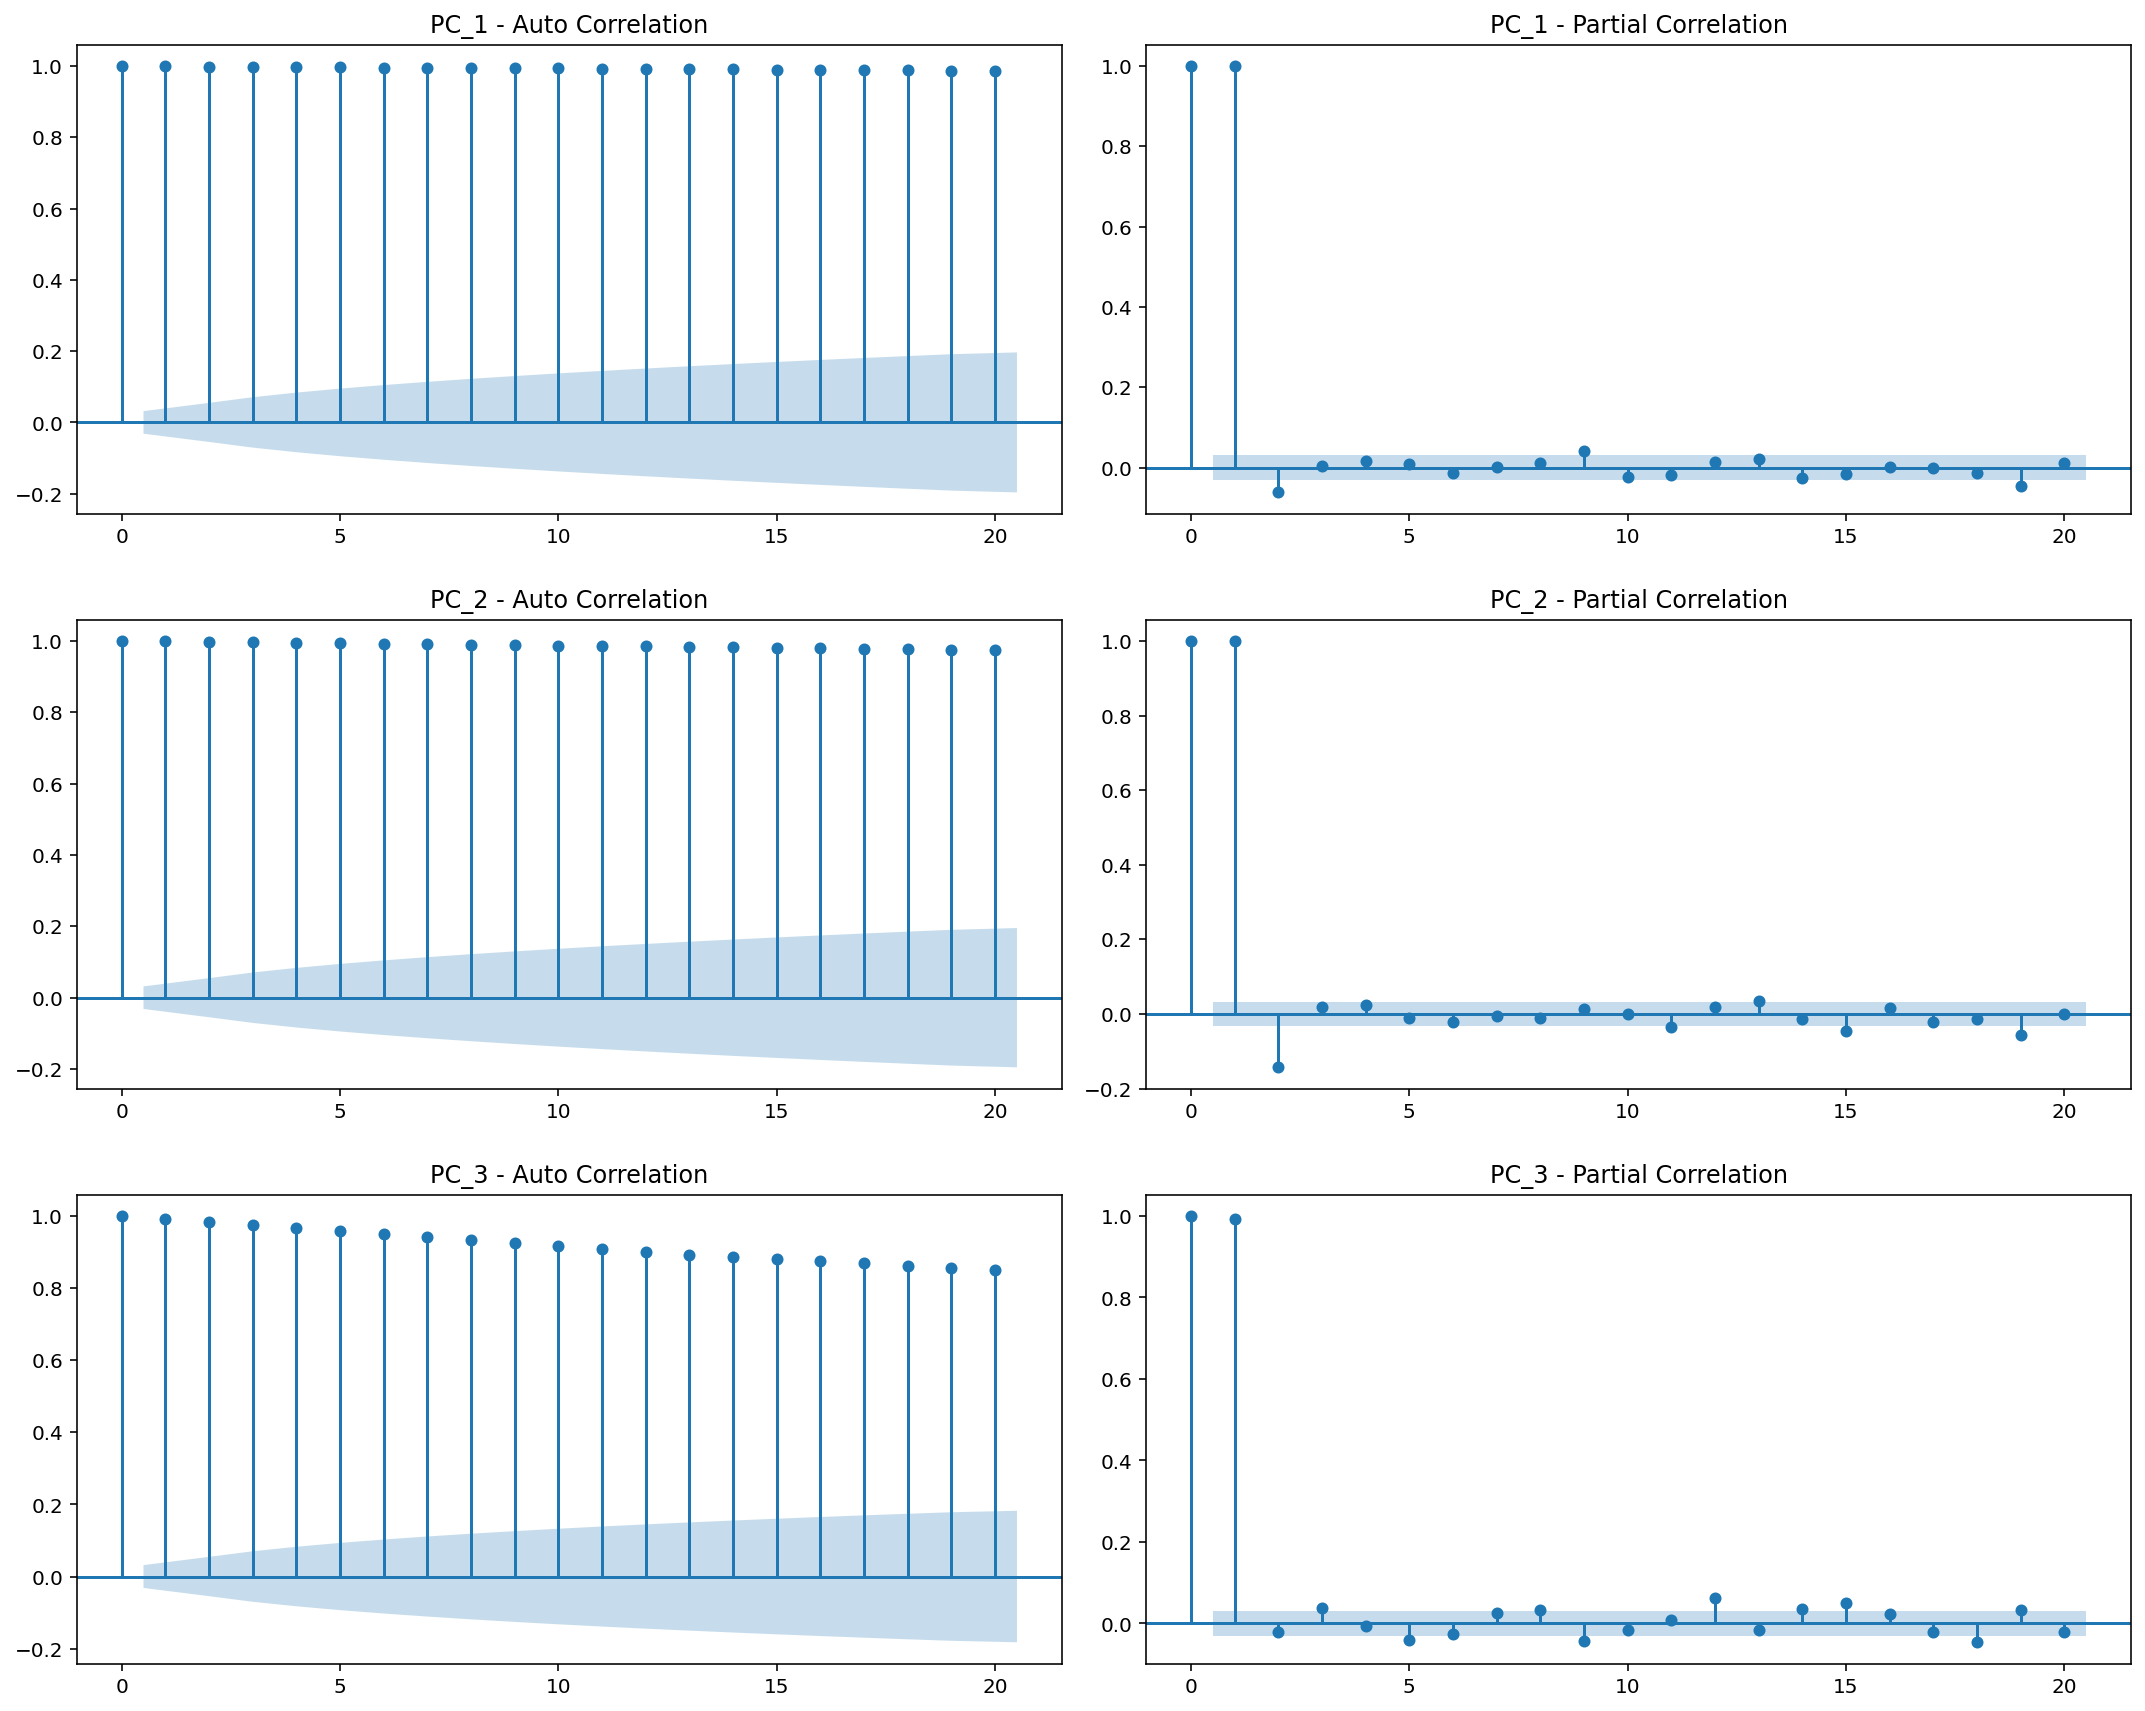

In [14]:
fig, axes = plt.subplots(cols_len, 2,figsize=(15,4*cols_len))

for i,j in enumerate (cols):
    plot_acf(T_k[j].values.tolist(), lags= 20, ax=axes[i][0], title=j+" - Auto Correlation")
    plot_pacf(T_k[j].values.tolist(), lags= 20, ax=axes[i][1], title=j+" - Partial Correlation")

plt.tight_layout(h_pad=2.0)
plt.show()

In [15]:
ad_fuller(df = T_k, cols = cols, confidence = "5%")

,adf_stat,p_val,result,crit_5%
PC_1,-0.361953,0.916260,non-stat,-2.862298
PC_2,-1.271339,0.642181,non-stat,-2.862298
PC_3,-3.338191,0.013255,stat,-2.862298


<div class="alert alert-block alert-info">
<b>Comment:</b> Principal component scores show trends over time, and exhibit significant autocorrelation with the first lag. Also ADF-test shows that all principal component scores are non-stationary, and thus have to be transformed. The easiest approach is to take first differences, which can eliminate any linear trend.
</div>

#### 4.3 First Differenced Series

In [16]:
for i in cols:
    T_k[i+"_diff"] = T_k[i].diff()    
    
T_k = T_k.iloc[1:]
T_k.head()

T_k_day,PC_1,PC_2,PC_3,PC_1_diff,PC_2_diff,PC_3_diff
2005-01-04,-16.316495,-3.641159,-1.350717,0.012325,0.027748,0.135572
2005-01-05,-16.419910,-3.646035,-1.325228,-0.103415,-0.004875,0.025490
2005-01-06,-16.196140,-3.634970,-1.370522,0.223770,0.011065,-0.045295
2005-01-07,-16.061056,-3.613224,-1.377357,0.135084,0.021746,-0.006834
2005-01-10,-16.046386,-3.620427,-1.359852,0.014670,-0.007203,0.017504


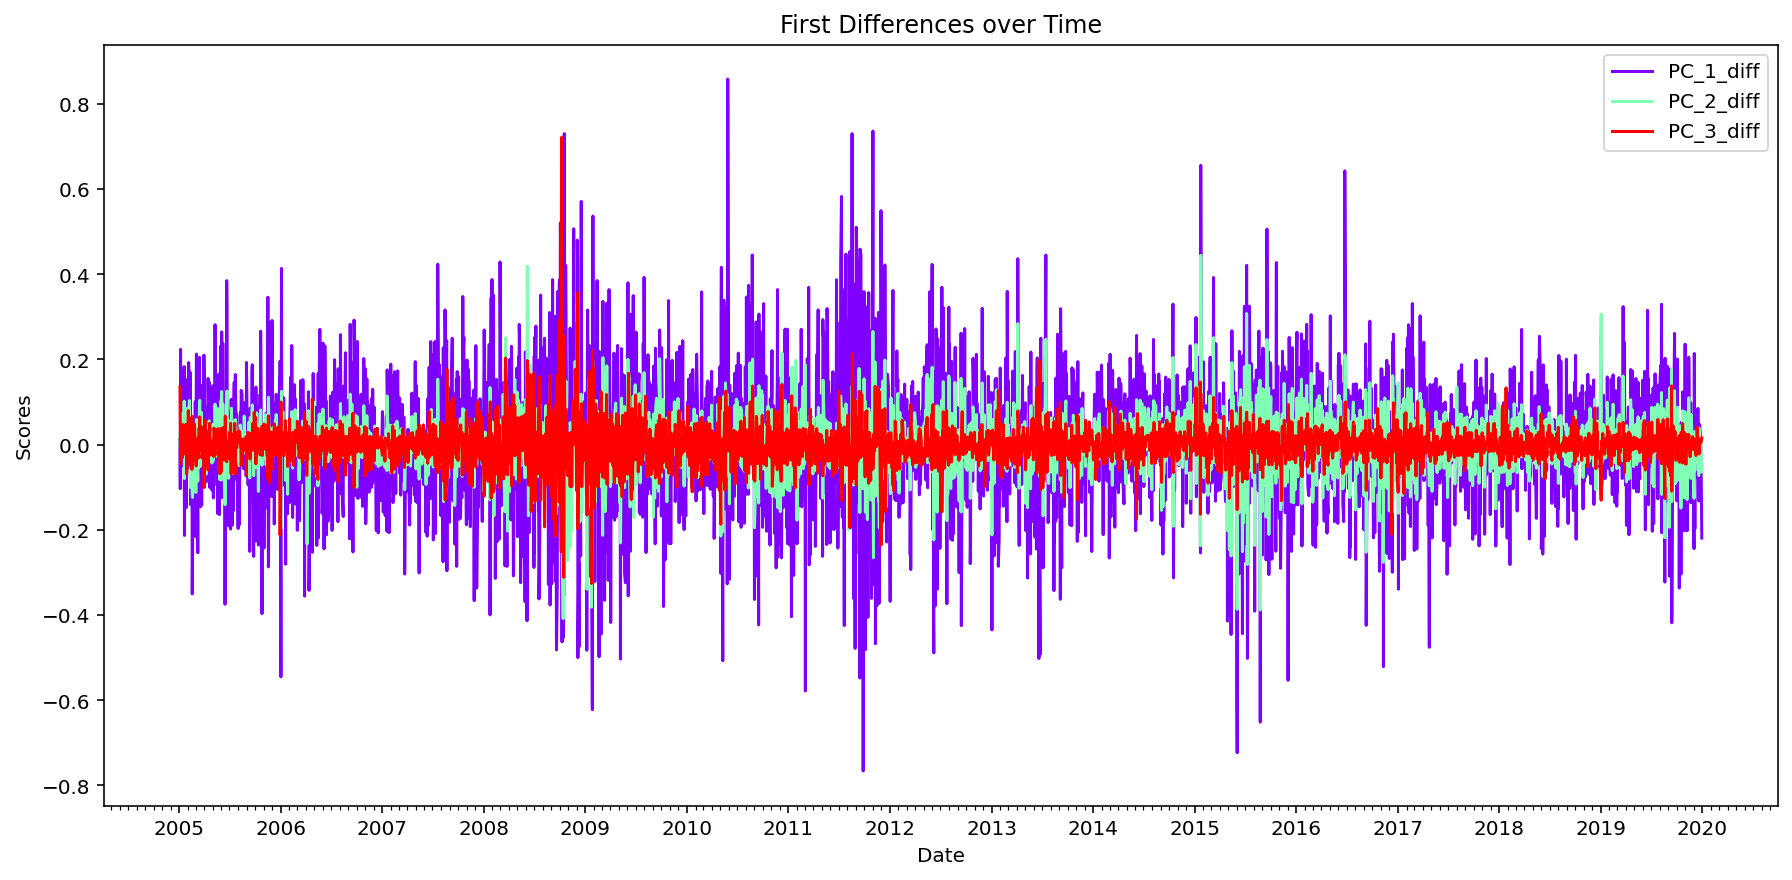

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (15,7))
color=cm.rainbow(np.linspace(0,1,cols_len))

for i,c in zip(cols_diff,color):
    plt.plot(T_k[i],c=c, label = i)

# Format axis
ax.set_title ("First Differences over Time")
ax.set_xlabel ("Date")
ax.set_ylabel ("Scores")

# Format ticks
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)

ax.legend()
plt.show()

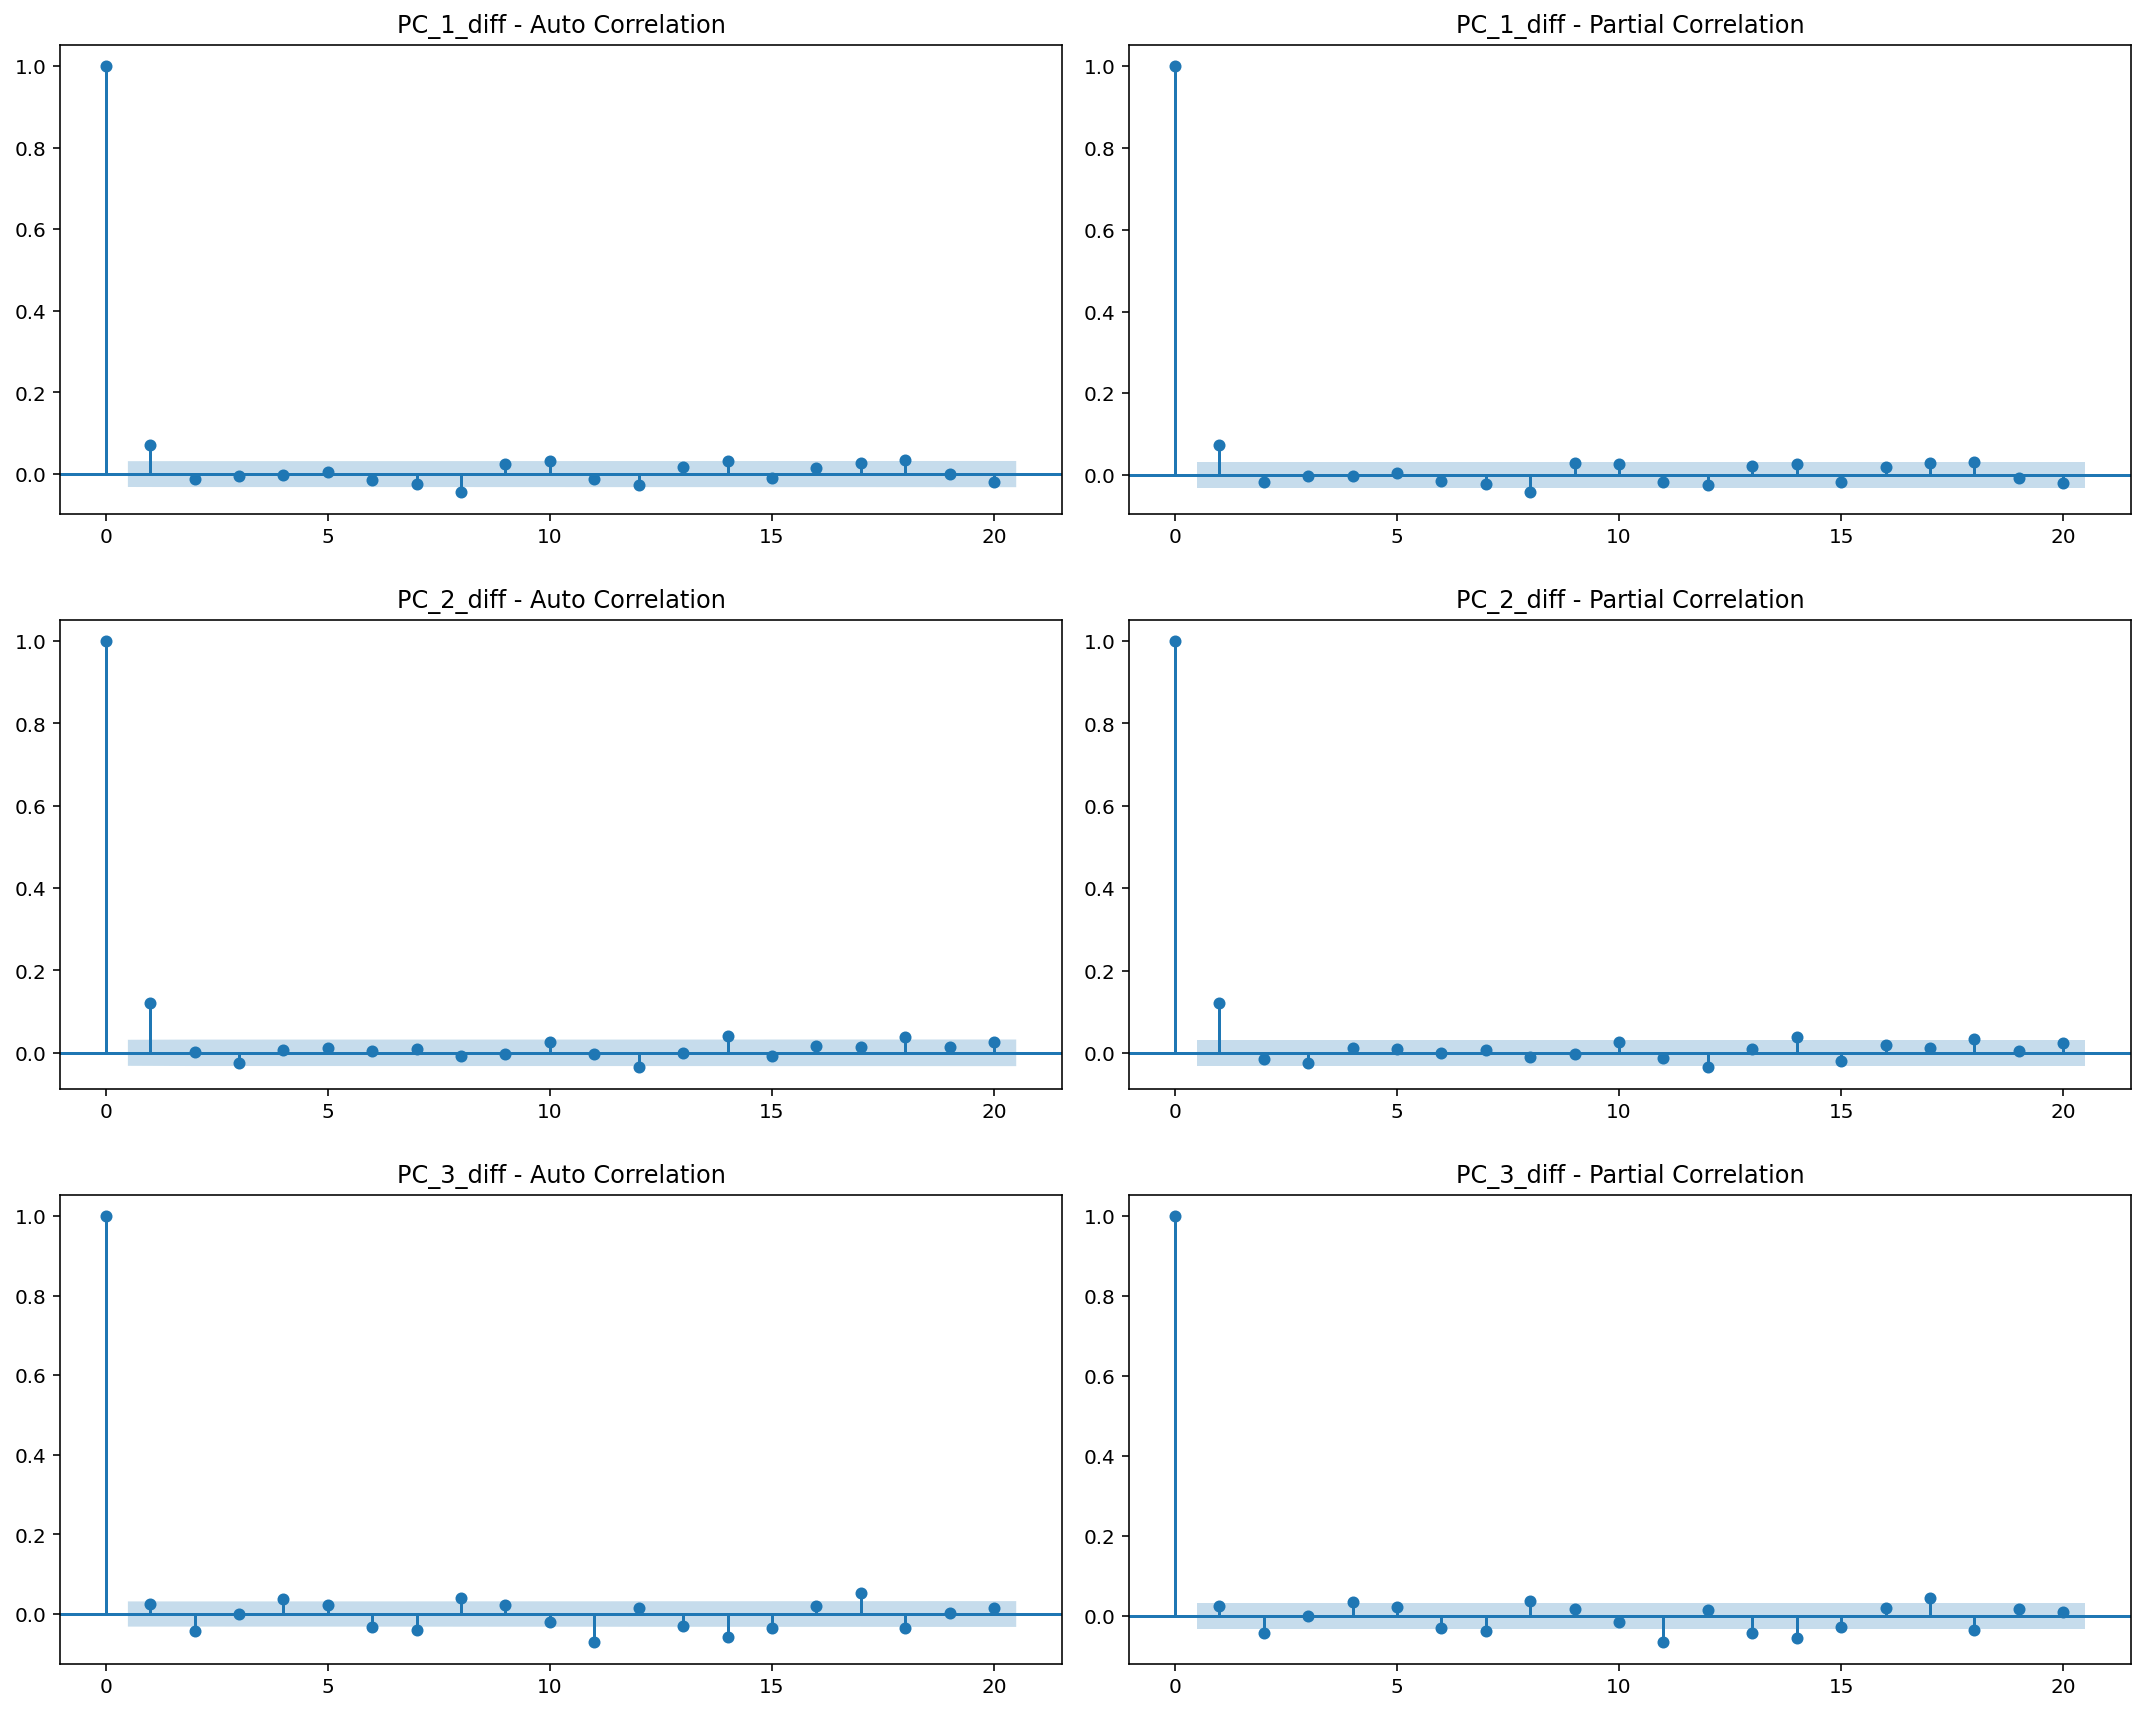

In [18]:
fig, axes = plt.subplots(cols_len, 2,figsize=(15,4*cols_len))


for i,j in enumerate (cols_diff):
    plot_acf(T_k[j].values.tolist(), lags= 20, ax=axes[i][0], title=j+" - Auto Correlation")
    plot_pacf(T_k[j].values.tolist(), lags= 20, ax=axes[i][1], title=j+" - Partial Correlation")

plt.tight_layout(h_pad=2.0)
plt.show()

In [19]:
ad_fuller(df = T_k, cols = cols_diff, confidence = "5%")

,adf_stat,p_val,result,crit_5%
PC_1_diff,-13.455208,0.000000,stat,-2.862298
PC_2_diff,-54.798907,0.000000,stat,-2.862298
PC_3_diff,-16.005444,0.000000,stat,-2.862298


<div class="alert alert-block alert-info">
<b>Comment:</b> After taking the frist differences, all PC-scpres seem to be stationary by applying ADF. Additionally the autocorrelation graphs show, that any significance of lag-terms has been removed through this transformation as well.
</div>

#### 4.4 Fractional Differenced Series

In [20]:
def fast_fracdiff(x, d):
    import pylab as pl
    T = len(x)
    np2 = int(2 ** np.ceil(np.log2(2 * T - 1)))
    k = np.arange(1, T) 
    b = (1,) + tuple(np.cumprod((k - d - 1) / k))
    z = (0,) * (np2 - T)
    z1 = b + z
    z2 = tuple(x) + z
    dx = pl.ifft(pl.fft(z1) * pl.fft(z2))
    return np.real(dx[0:T])

In [21]:
for i in cols:
    T_k[i+"_frac"] = fast_fracdiff(x = T_k[i], d = 0.15)

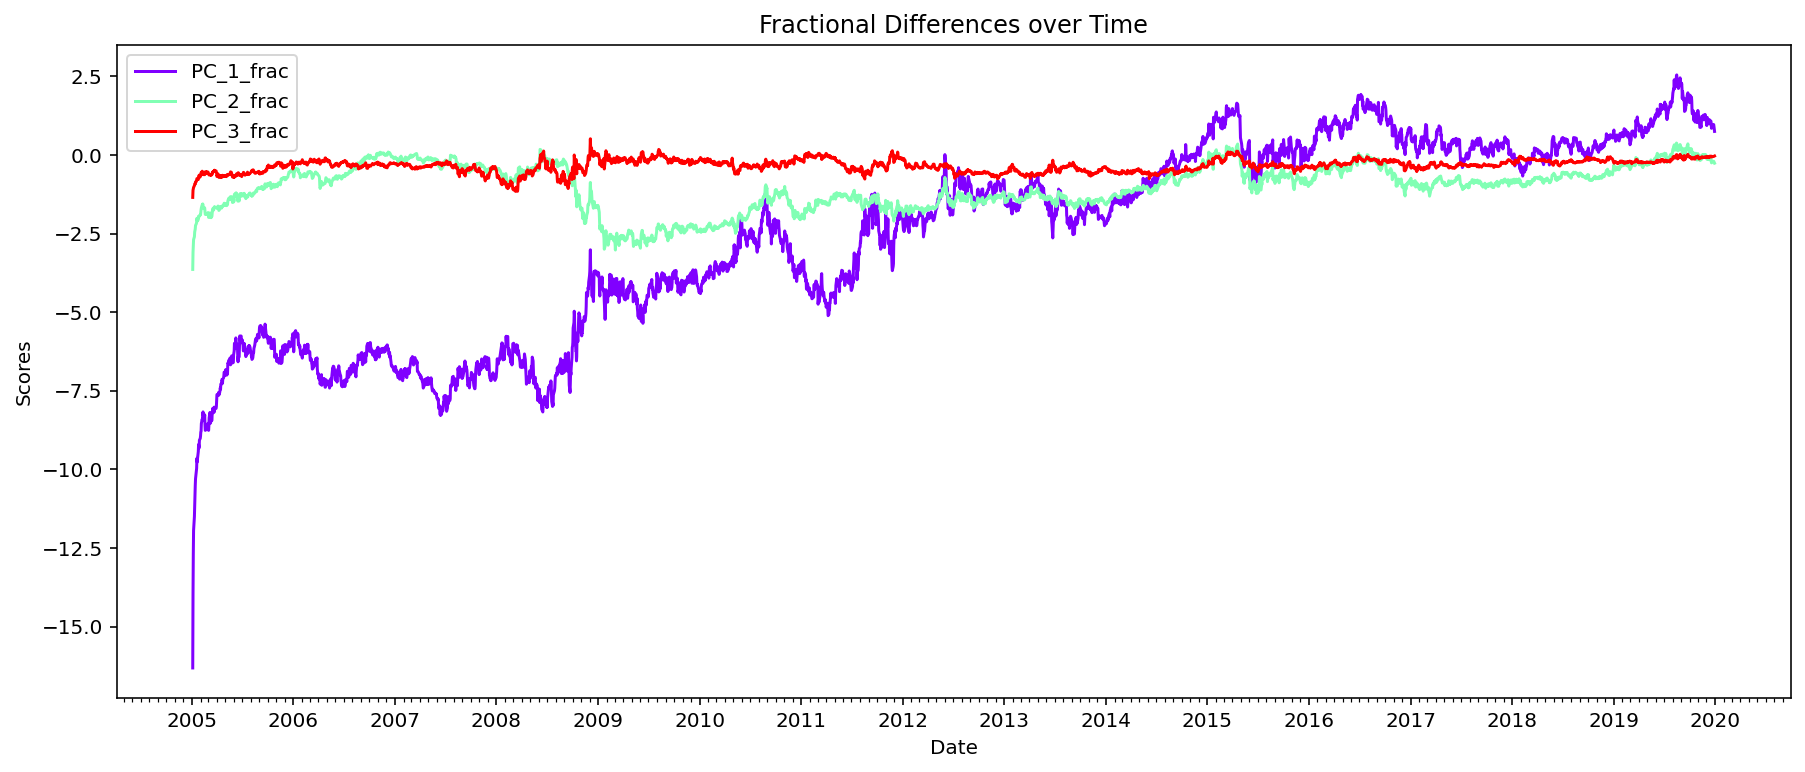

In [22]:
fig, ax = plt.subplots(1, 1, figsize = (15,6))
color=cm.rainbow(np.linspace(0,1,cols_len))

for i,c in zip(cols_frac,color):
    plt.plot(T_k[i],c=c, label = i)

# Format axis
ax.set_title ("Fractional Differences over Time")
ax.set_xlabel ("Date")
ax.set_ylabel ("Scores")

# Format ticks
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)

ax.legend()
plt.show()

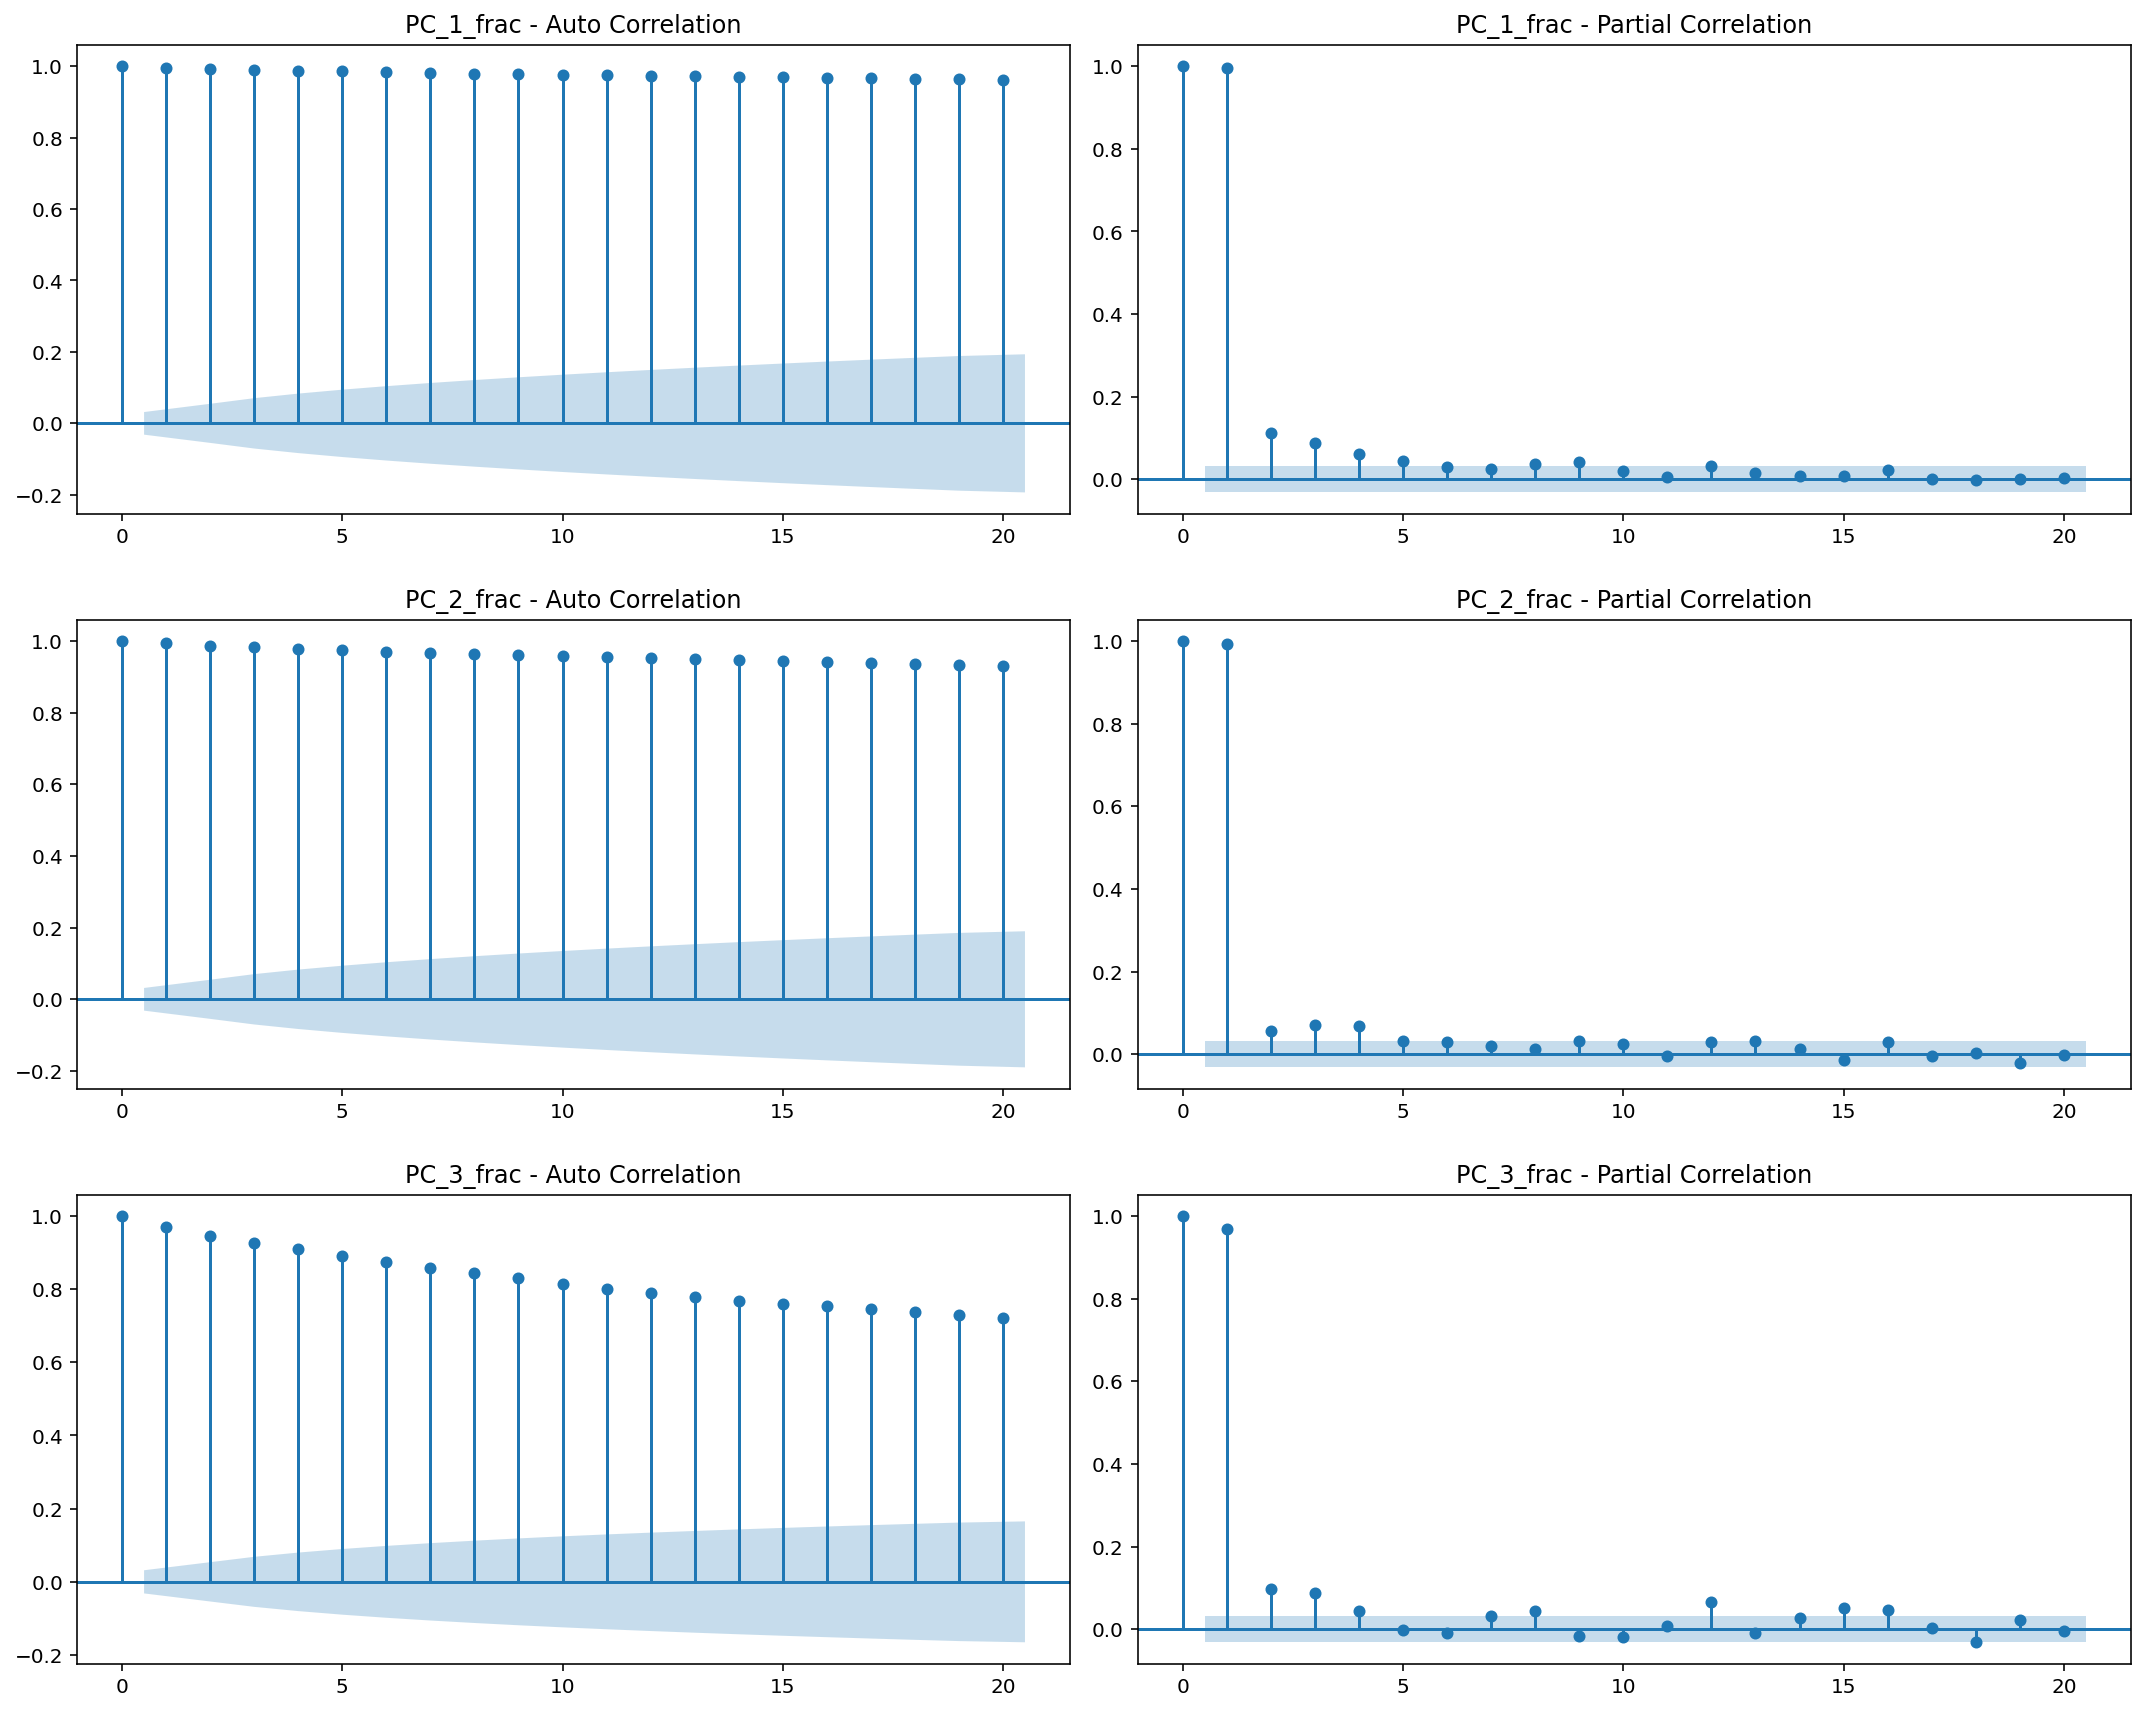

In [23]:
fig, axes = plt.subplots(cols_len, 2,figsize=(15,4*cols_len))

for i,j in enumerate (cols_frac):
    plot_acf(T_k[j].values.tolist(), lags= 20, ax=axes[i][0], title=j+" - Auto Correlation")
    plot_pacf(T_k[j].values.tolist(), lags= 20, ax=axes[i][1], title=j+" - Partial Correlation")

plt.tight_layout(h_pad=2.0)
plt.show()

In [24]:
ad_fuller(df = T_k, cols = cols_frac, confidence = "5%")

,adf_stat,p_val,result,crit_5%
PC_1_frac,-2.250628,0.188386,non-stat,-2.862299
PC_2_frac,-1.986553,0.292500,non-stat,-2.862299
PC_3_frac,-4.554502,0.000157,stat,-2.862299


### 5 Causality
***

#### 5.1 Granger-Causality Test

In order for a Vector Autoregressive (VAR) model to work, the interdependencies to the endogenous variables (PC1, PC2, PC3) should be significant. To testify this assumption, the Granger Causality test can be applied. It basically regresses Y on a specified number of its own lags, and adds the first lag of another endogenous variable. An f-test is being computed that states, if any of the added endogenous variables is significant enough to help forecasting Y.

In [25]:
def granger_causality(df, Y, X, lag, test= "ssr_ftest", alpha = 0.05):

    model = grangercausalitytests(df[[Y, X]], maxlag = lag, verbose = False)
    
    lags = ["lag_"+str(i) for i in range(1, lag+1)]
    f_stat = [model[i][0][test][0] for i in range(1, lag+1)]
    p_val  = [model[i][0][test][1] for i in range(1, lag+1)]
    sign = [1 if i <alpha else 0 for i in p_val]
    
    # Output
    output_1 = pd.DataFrame(f_stat, columns = ["f_stat"], index = lags).T
    output_1["f_stat"] = Y+X[2:]
    output_1 = output_1.set_index("f_stat")
    
    output_2 = pd.DataFrame(p_val, columns = ["p_val"], index = lags).T
    output_2["p_val"] = Y+X[2:]
    output_2 = output_2.set_index("p_val")
    
    output_3 = pd.DataFrame(sign, columns = ["sign"], index = lags).T
    output_3["sign"] = Y+X[2:]
    output_3 = output_3.set_index("sign")
    
    return output_1, output_2, output_3

#### 5.2 Original Series

In [26]:
comb_x = [i if i != j else None for j in cols for i in cols_diff]
comb_y = [j if i != j else None for j in cols for i in cols_diff]

comb_x = list(filter(None, comb_x))
comb_y = list(filter(None, comb_y))

In [27]:
granger_df = pd.DataFrame()

for x,y in zip (comb_x,comb_y):
    new = granger_causality(T_k, Y = y, X = x, lag = 5)[2]
    granger_df = pd.concat([granger_df, new], axis = 0)
    
granger_df.index.name = None
granger_df

,lag_1,lag_2,lag_3,lag_4,lag_5
PC_1_1_diff,1,0,0,0,0
PC_1_2_diff,1,0,0,1,1
PC_1_3_diff,0,0,0,0,0
PC_2_1_diff,1,0,1,1,0
PC_2_2_diff,1,0,0,0,0
PC_2_3_diff,1,1,1,1,1
PC_3_1_diff,1,1,1,1,1
PC_3_2_diff,1,1,1,1,1
PC_3_3_diff,0,0,0,0,0


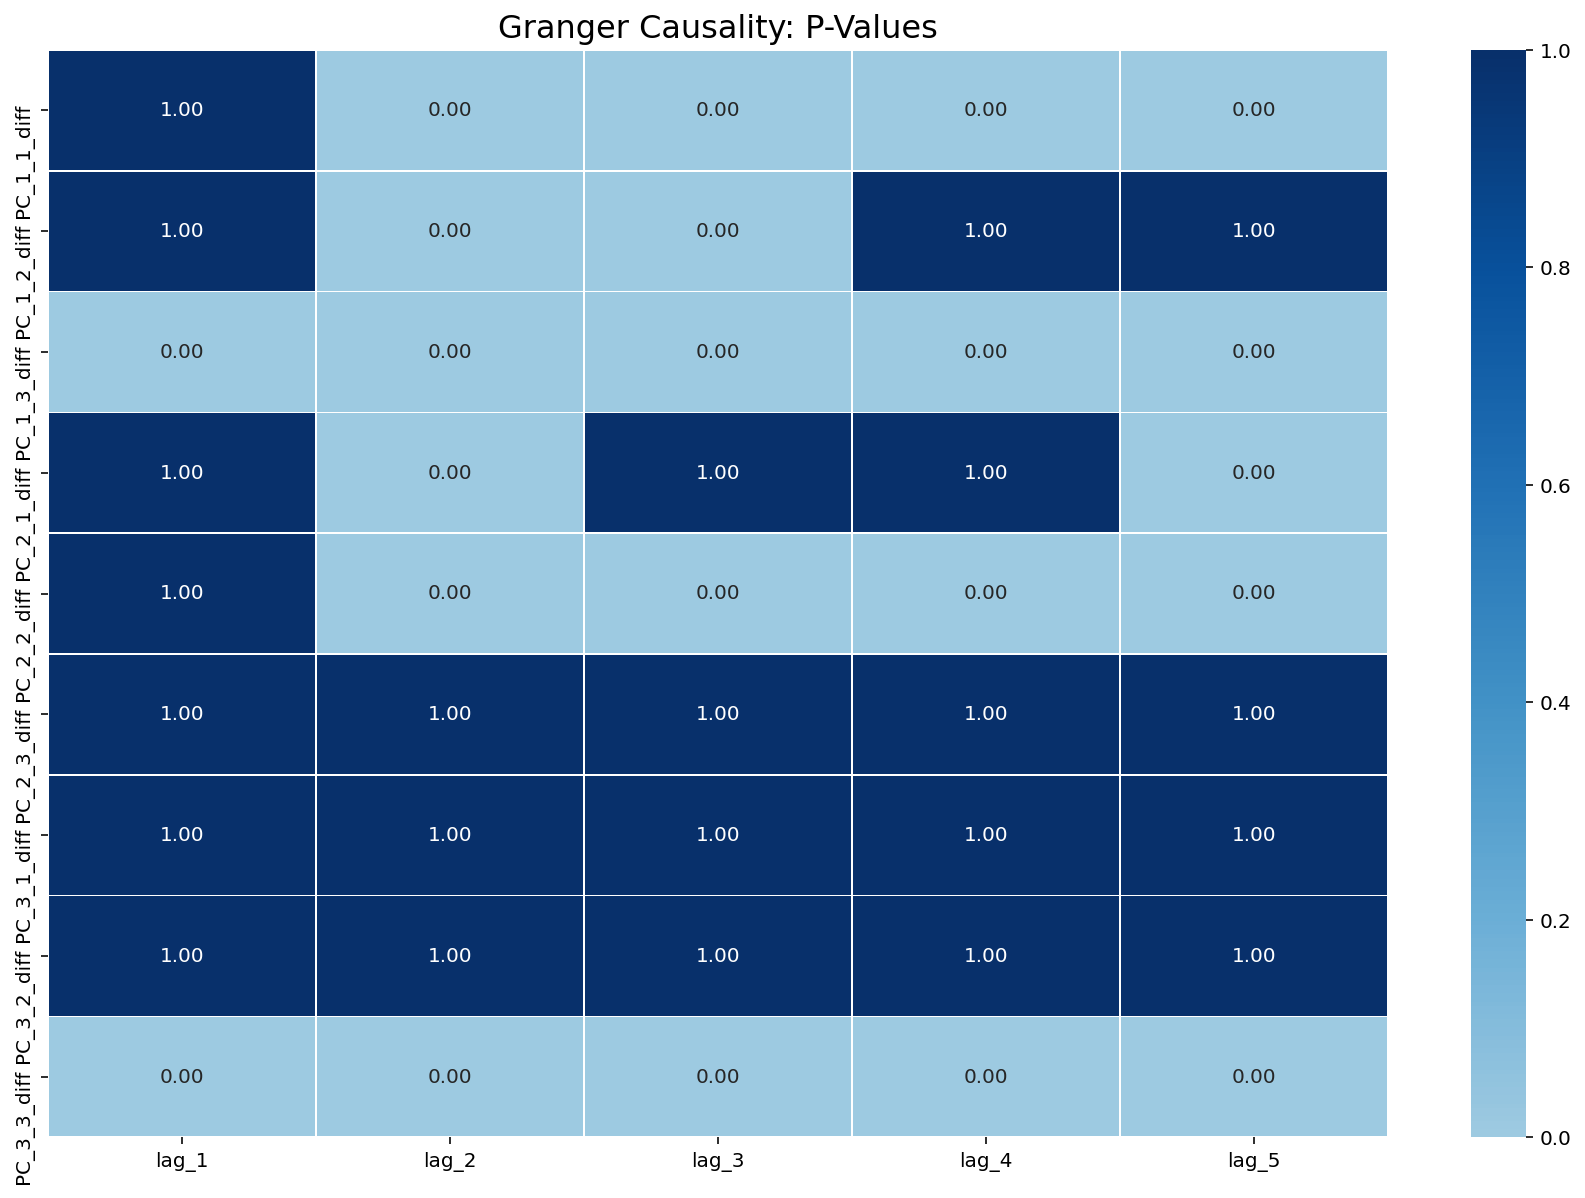

In [28]:
fig, ax = plt.subplots(1, 1, figsize = (15,10))

plt.title("Granger Causality: P-Values", fontsize = 16)
ttl = ax.title
ttl.set_position([0.5,1.05])

sns.heatmap(granger_df, 
            fmt=".2f", 
            cmap = "Blues", 
            linewidth = 0.3, 
            annot = True,
            center = 0.2)

plt.show()

### 6 Model
***

#### 6.1 Train-Test Yields

In [29]:
X_k_train = X_k[X_k.index < pred_start]

spot_train = spot[spot.index < pred_start]
spot_test = spot[spot.index >= pred_start]

In [51]:
# Train-set of actual spot rates
spot_train.tail()

test_spot_day,3M,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,...,12Y,14Y,16Y,18Y,20Y,22Y,24Y,26Y,28Y,30Y
2016-12-23,-0.906815,-0.867869,-0.836306,-0.813228,-0.741095,-0.610535,-0.447306,-0.275802,-0.111503,0.037933,...,0.469780,0.608487,0.714541,0.797630,0.864278,0.918858,0.964357,1.002859,1.035862,1.064466
2016-12-27,-0.908112,-0.866790,-0.836961,-0.821831,-0.752193,-0.620067,-0.454727,-0.282396,-0.118926,0.028341,...,0.446927,0.579614,0.680719,0.759806,0.823200,0.875102,0.918363,0.954970,0.986349,1.013544
2016-12-28,-0.917724,-0.877231,-0.846919,-0.831543,-0.765447,-0.637848,-0.475644,-0.304319,-0.139972,0.009476,...,0.440476,0.578589,0.684111,0.766754,0.833032,0.887307,0.932549,0.970834,1.003651,1.032092
2016-12-29,-0.929979,-0.879916,-0.834485,-0.803855,-0.736307,-0.613905,-0.459018,-0.294890,-0.136758,0.007623,...,0.426789,0.561786,0.665056,0.745983,0.810901,0.864067,0.908386,0.945891,0.978039,1.005902
2016-12-30,-0.927596,-0.871451,-0.822444,-0.800098,-0.743420,-0.627223,-0.473372,-0.306528,-0.143497,0.006776,...,0.448330,0.591660,0.701505,0.787655,0.856789,0.913416,0.960623,1.000573,1.034817,1.064496


In [52]:
# Test-set of actual spot rates
spot_test.head()

test_spot_day,3M,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,...,12Y,14Y,16Y,18Y,20Y,22Y,24Y,26Y,28Y,30Y
2017-01-02,-0.791214,-0.780195,-0.790530,-0.818167,-0.774115,-0.659756,-0.505375,-0.337898,-0.174519,-0.024116,...,0.417493,0.560900,0.670844,0.757091,0.826311,0.883010,0.930279,0.970281,1.004570,1.034288
2017-01-03,-0.779862,-0.769149,-0.778623,-0.798726,-0.742486,-0.615024,-0.448786,-0.271489,-0.100350,0.056050,...,0.510880,0.657632,0.769968,0.858030,0.928684,0.986552,1.034792,1.075616,1.110609,1.140937
2017-01-04,-0.810978,-0.794128,-0.792114,-0.796286,-0.732990,-0.603580,-0.437412,-0.260548,-0.089545,0.067152,...,0.525518,0.674182,0.788153,0.877563,0.949323,1.008105,1.057110,1.098582,1.134131,1.164941
2017-01-05,-0.799905,-0.779600,-0.770749,-0.765219,-0.698431,-0.569758,-0.406408,-0.233034,-0.065462,0.088174,...,0.538399,0.684686,0.796898,0.884953,0.955634,1.013535,1.061808,1.102660,1.137678,1.168027
2017-01-06,-0.790154,-0.764435,-0.748755,-0.739340,-0.674712,-0.550119,-0.391077,-0.221620,-0.057408,0.093414,...,0.536313,0.680395,0.790940,0.877696,0.947337,1.004387,1.051950,1.092201,1.126705,1.156608


#### 6.2 Train-Test Scores

In [32]:
train = T_k[T_k.index<pred_start]
test  = T_k[T_k.index>=pred_start]

if diff == "yes":
    X_train = train[cols_diff]
    X_test = test[cols_diff]

else:
    X_train = train[cols]
    X_test = test[cols]
    
last_train = train.iloc[-1,:len(cols)]
last_train

T_k_day
PC_1   -0.583553
PC_2   -3.112788
PC_3   -1.110019
Name: 2016-12-30 00:00:00, dtype: float64

In [33]:
print (f"Train set: Dates range from {train.index[0].date()} to {train.index[-1].date()}")
train[cols].tail()

Train set: Dates range from 2005-01-04 to 2016-12-30


T_k_day,PC_1,PC_2,PC_3
2016-12-23,-0.643363,-3.128844,-1.080922
2016-12-27,-0.540667,-3.062981,-1.040588
2016-12-28,-0.518828,-3.097406,-1.084294
2016-12-29,-0.494873,-3.038597,-1.025540
2016-12-30,-0.583553,-3.112788,-1.110019


#### 6.3 AR-Model

<img src="../assets/img/ar-model.PNG">

In [34]:
pred_ar = pd.DataFrame()

for i in X_train.columns:
    model = AR(X_train[i].values)
    model_fitted = model.fit(maxlag = lag)

    pred = model_fitted.predict(start = len(X_train), 
                                end   = len(X_train) + steps - 1, 
                                dynamic = False)
    
    pred = pd.DataFrame(pred, columns = [i], index = spot_test.index[:steps])
    pred_ar = pd.concat([pred_ar, pred], axis = 1)

    print ("\n"+i.center(80))
    print (model_fitted.summary().tables[0])
    print (model_fitted.summary().tables[1])


                                   PC_1_diff                                    
                               AR Model Results                               
Dep. Variable:                      y   No. Observations:                 3070
Model:                          AR(5)   Log Likelihood                1289.439
Method:                          cmle   S.D. of innovations              0.159
Date:                Wed, 06 Jan 2021   AIC                             -3.675
Time:                        11:38:16   BIC                             -3.661
Sample:                             0   HQIC                            -3.670
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.003      1.655      0.098      -0.001       0.010
L1.y           0.0833      0.018      4.606      

In [35]:
pred_ar.columns.name = "pred_spot_"+str(freq)
pred_ar

pred_spot_day,PC_1_diff,PC_2_diff,PC_3_diff
2017-01-02,-0.002704,-0.009096,-0.001841
2017-01-03,0.007462,-0.001352,0.002975
2017-01-04,0.006050,0.002170,0.001010
2017-01-05,0.005691,0.001066,-0.001808
2017-01-06,0.004317,-0.001046,-0.002130


#### 6.4 VAR-Model

<img src="../assets/img/var-model.PNG">

In [36]:
var = VAR(X_train.values)

model_fitted = var.fit(lag)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 06, Jan, 2021
Time:                     11:38:16
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -15.8164
Nobs:                     3065.00    HQIC:                  -15.8769
Log likelihood:           11384.1    FPE:                1.23037e-07
AIC:                     -15.9108    Det(Omega_mle):     1.21130e-07
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.004443         0.002883            1.541           0.123
L1.y1         0.102921         0.027021            3.809           0.000
L1.y2        -0.053201         0.063039           -0.844           0.399
L1.y3         0.117293

In [37]:
pred_var = model_fitted.forecast(y = X_train[-lag:].values, steps = steps)
pred_var = pd.DataFrame(pred_var, columns = X_train.columns, index = spot_test.index[:steps])
pred_var.index = pd.to_datetime(pred_var.index)

print ("Prediction VAR-Model:")
pred_var

Prediction VAR-Model:


T_k_day,PC_1_diff,PC_2_diff,PC_3_diff
2017-01-02,-0.015633,-0.015870,0.003481
2017-01-03,0.015946,0.005986,0.004107
2017-01-04,0.003847,0.002623,0.000255
2017-01-05,0.014498,0.006071,-0.003937
2017-01-06,0.002357,-0.002326,-0.003824


### 7 Back-Transform
***

#### 7.1 PC-Scores

In [38]:
# Select the model type
if model == "var":
    pred_scores = pred_var    
else:
    pred_scores = pred_ar


# If differenced, convert I(1) back to I(0)
if diff == "yes":
    c=0
    
    for i,j in zip (cols_cum, cols_diff):
        pred_scores[i] = pred_scores[j].cumsum()

    for i,j in zip (cols, cols_cum):
        pred_scores[i] = pred_scores[j] + last_train[c]
        c=c+1

pred_scores = pred_scores[cols]
pred_scores.columns.name = "pred_pc_"+str(freq)
pred_scores

pred_pc_day,PC_1,PC_2,PC_3
2017-01-02,-0.586257,-3.121884,-1.111860
2017-01-03,-0.578795,-3.123237,-1.108885
2017-01-04,-0.572746,-3.121067,-1.107875
2017-01-05,-0.567055,-3.120002,-1.109683
2017-01-06,-0.562738,-3.121048,-1.111812


#### 7.2 Spot Rates

In [39]:
# Time series model
pred_spot = np.matrix(pred_scores) * np.matrix(W_k_inv)
pred_spot = pd.DataFrame(data = pred_spot,
                         columns = W_k_inv.columns,
                         index = spot_test.index[:steps])

pred_spot.columns.name = "pred_spot_"+str(freq)
pred_spot

pred_spot_day,3M,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,...,12Y,14Y,16Y,18Y,20Y,22Y,24Y,26Y,28Y,30Y
2017-01-02,-0.684462,-0.801457,-0.938967,-0.969434,-0.849961,-0.673518,-0.478149,-0.282163,-0.095303,0.077100,...,0.588200,0.740511,0.836839,0.888792,0.907073,0.900769,0.877209,0.842088,0.799708,0.753232
2017-01-03,-0.687693,-0.804498,-0.941494,-0.971152,-0.851213,-0.674523,-0.479044,-0.283035,-0.096208,0.076129,...,0.586870,0.739025,0.835229,0.887094,0.905316,0.898975,0.875394,0.840266,0.797885,0.751413
2017-01-04,-0.688423,-0.805156,-0.942056,-0.971687,-0.851830,-0.675262,-0.479919,-0.284047,-0.097351,0.074865,...,0.585247,0.737296,0.833435,0.885268,0.903482,0.897151,0.873594,0.838497,0.796153,0.749721
2017-01-05,-0.688370,-0.805270,-0.942564,-0.972806,-0.853306,-0.676930,-0.481675,-0.285823,-0.099105,0.073158,...,0.583805,0.735974,0.832212,0.884120,0.902390,0.896101,0.872574,0.837498,0.795170,0.748751
2017-01-06,-0.688764,-0.805871,-0.943566,-0.974318,-0.855032,-0.678704,-0.483400,-0.287445,-0.100595,0.071812,...,0.582984,0.735342,0.831717,0.883718,0.902045,0.895785,0.872268,0.837188,0.794847,0.748409


#### 7.3 Naive Model

In [40]:
# Naive forecast
naive = pd.DataFrame(spot_train.iloc[-1,:]).T
naive = pd.concat([naive]*steps, ignore_index=True)
naive.index = spot_test.index[:steps]

naive.columns.name = "naive_spot_"+str(freq)
naive

naive_spot_day,3M,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,...,12Y,14Y,16Y,18Y,20Y,22Y,24Y,26Y,28Y,30Y
2017-01-02,-0.927596,-0.871451,-0.822444,-0.800098,-0.743420,-0.627223,-0.473372,-0.306528,-0.143497,0.006776,...,0.448330,0.591660,0.701505,0.787655,0.856789,0.913416,0.960623,1.000573,1.034817,1.064496
2017-01-03,-0.927596,-0.871451,-0.822444,-0.800098,-0.743420,-0.627223,-0.473372,-0.306528,-0.143497,0.006776,...,0.448330,0.591660,0.701505,0.787655,0.856789,0.913416,0.960623,1.000573,1.034817,1.064496
2017-01-04,-0.927596,-0.871451,-0.822444,-0.800098,-0.743420,-0.627223,-0.473372,-0.306528,-0.143497,0.006776,...,0.448330,0.591660,0.701505,0.787655,0.856789,0.913416,0.960623,1.000573,1.034817,1.064496
2017-01-05,-0.927596,-0.871451,-0.822444,-0.800098,-0.743420,-0.627223,-0.473372,-0.306528,-0.143497,0.006776,...,0.448330,0.591660,0.701505,0.787655,0.856789,0.913416,0.960623,1.000573,1.034817,1.064496
2017-01-06,-0.927596,-0.871451,-0.822444,-0.800098,-0.743420,-0.627223,-0.473372,-0.306528,-0.143497,0.006776,...,0.448330,0.591660,0.701505,0.787655,0.856789,0.913416,0.960623,1.000573,1.034817,1.064496


### 8 Model Evaluation
***

#### 8.1 Results

In [41]:
spot_test.columns.name = "test_spot_"+str(freq)
spot_test.iloc[:steps,:5]

test_spot_day,3M,6M,1Y,2Y,3Y
2017-01-02,-0.791214,-0.780195,-0.790530,-0.818167,-0.774115
2017-01-03,-0.779862,-0.769149,-0.778623,-0.798726,-0.742486
2017-01-04,-0.810978,-0.794128,-0.792114,-0.796286,-0.732990
2017-01-05,-0.799905,-0.779600,-0.770749,-0.765219,-0.698431
2017-01-06,-0.790154,-0.764435,-0.748755,-0.739340,-0.674712


In [42]:
pred_spot.columns.name = "pred_spot_"+str(freq)
pred_spot.iloc[:5,:5]

pred_spot_day,3M,6M,1Y,2Y,3Y
2017-01-02,-0.684462,-0.801457,-0.938967,-0.969434,-0.849961
2017-01-03,-0.687693,-0.804498,-0.941494,-0.971152,-0.851213
2017-01-04,-0.688423,-0.805156,-0.942056,-0.971687,-0.851830
2017-01-05,-0.688370,-0.805270,-0.942564,-0.972806,-0.853306
2017-01-06,-0.688764,-0.805871,-0.943566,-0.974318,-0.855032


#### 8.2 Error

In [43]:
error_act = pred_spot - spot_test.iloc[:steps,:]
error_act.index = error_act.index.date
error_act.columns.name = "err_spot_"+freq
error_act

err_spot_day,3M,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,...,12Y,14Y,16Y,18Y,20Y,22Y,24Y,26Y,28Y,30Y
2017-01-02,0.106751,-0.021263,-0.148437,-0.151267,-0.075847,-0.013762,0.027225,0.055735,0.079216,0.101216,...,0.170707,0.179611,0.165994,0.131701,0.080763,0.017759,-0.053070,-0.128193,-0.204863,-0.281056
2017-01-03,0.092168,-0.035349,-0.162871,-0.172426,-0.108728,-0.059498,-0.030258,-0.011546,0.004142,0.020078,...,0.075990,0.081393,0.065261,0.029064,-0.023369,-0.087577,-0.159398,-0.235351,-0.312725,-0.389524
2017-01-04,0.122555,-0.011029,-0.149942,-0.175401,-0.118840,-0.071682,-0.042506,-0.023499,-0.007806,0.007713,...,0.059729,0.063114,0.045282,0.007705,-0.045841,-0.110953,-0.183516,-0.260085,-0.337978,-0.415219
2017-01-05,0.111536,-0.025670,-0.171815,-0.207587,-0.154875,-0.107172,-0.075267,-0.052789,-0.033643,-0.015015,...,0.045407,0.051288,0.035314,-0.000832,-0.053244,-0.117434,-0.189234,-0.265162,-0.342508,-0.419277
2017-01-06,0.101391,-0.041436,-0.194811,-0.234977,-0.180321,-0.128586,-0.092323,-0.065825,-0.043188,-0.021602,...,0.046670,0.054948,0.040777,0.006023,-0.045291,-0.108601,-0.179682,-0.255013,-0.331858,-0.408199


In [44]:
error_naive = naive - spot_test.iloc[:steps,:]
error_naive.index = error_naive.index.date

mae_act    = pd.Series([abs(error_act.iloc[i,:]).mean() for i in range(steps)])
mae_naive  = pd.Series([abs(error_naive.iloc[i,:]).mean() for i in range(steps)])

err = pd.concat([mae_act, mae_naive], axis = 1)
err.columns = ["mae_act", "mae_naive"]
err.index = pred_spot.index

err

,mae_act,mae_naive
2017-01-02,0.111759,0.037848
2017-01-03,0.102075,0.058438
2017-01-04,0.105550,0.068725
2017-01-05,0.113587,0.084695
2017-01-06,0.118215,0.088344


In [45]:
file_object = open("../assets/files/04-results/time-series.txt", "a")
file_object.write(str(err))
file_object.close()

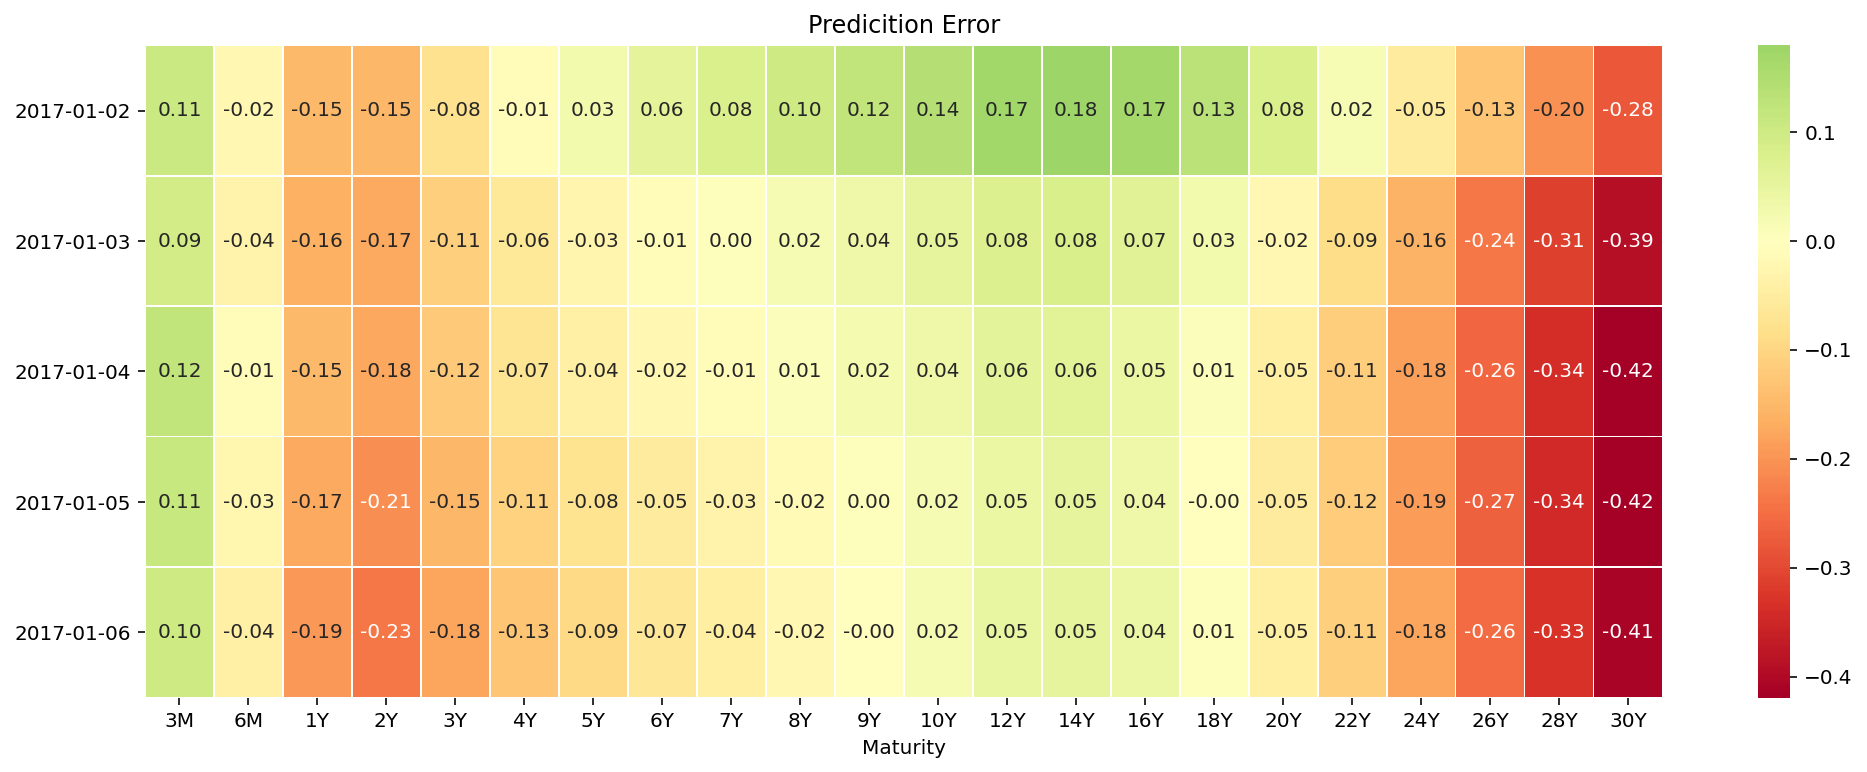

In [46]:
fig, ax = plt.subplots(1, 1, figsize = (17,6))

plt.title("Predicition Error", fontsize = 12)
ttl = ax.title
ttl.set_position([0.5,1.02])

sns.heatmap(error_act, 
            fmt=".2f", 
            cmap = "RdYlGn", 
            linewidth = 0.3, 
            annot = True,
            center = 0)

plt.yticks(rotation=0)
plt.xlabel("Maturity")
plt.show()

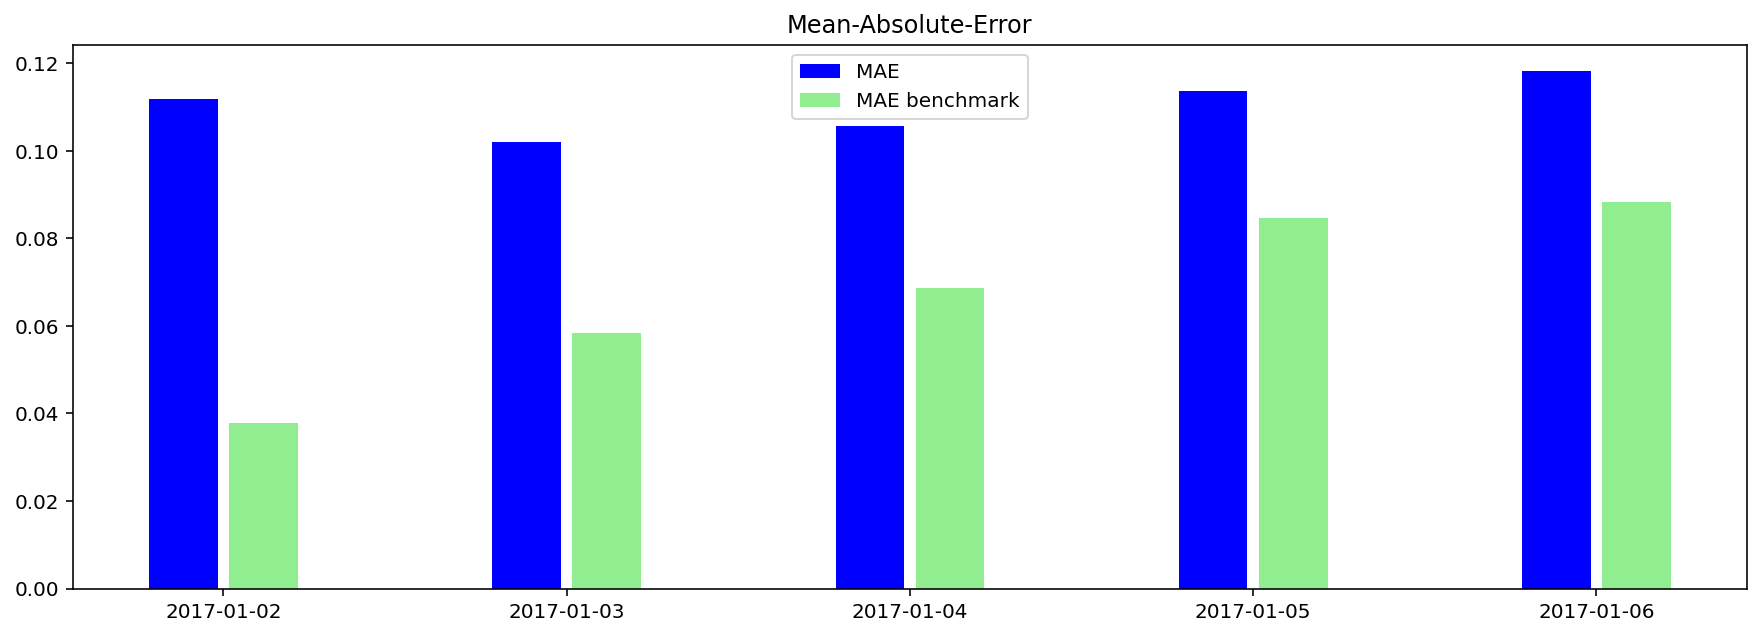

In [47]:
# Helper
indx = np.arange(err.shape[0])
bar_width = 0.2


# Chart
fig, ax = plt.subplots(1,1, figsize = [15,5])

ax.bar(indx - 0.05 - bar_width/3, err["mae_act"], bar_width, color = "blue", label = "MAE")
ax.bar(indx + 0.05 + bar_width/3, err["mae_naive"], bar_width, color = "lightgreen", label = "MAE benchmark")

ax.set_title("Mean-Absolute-Error")
ax.set_xticks(indx)
ax.set_xticklabels(err.index.date)
ax.legend()

plt.show()

### 9 Visualization
***

#### 9.1 PC-Scores

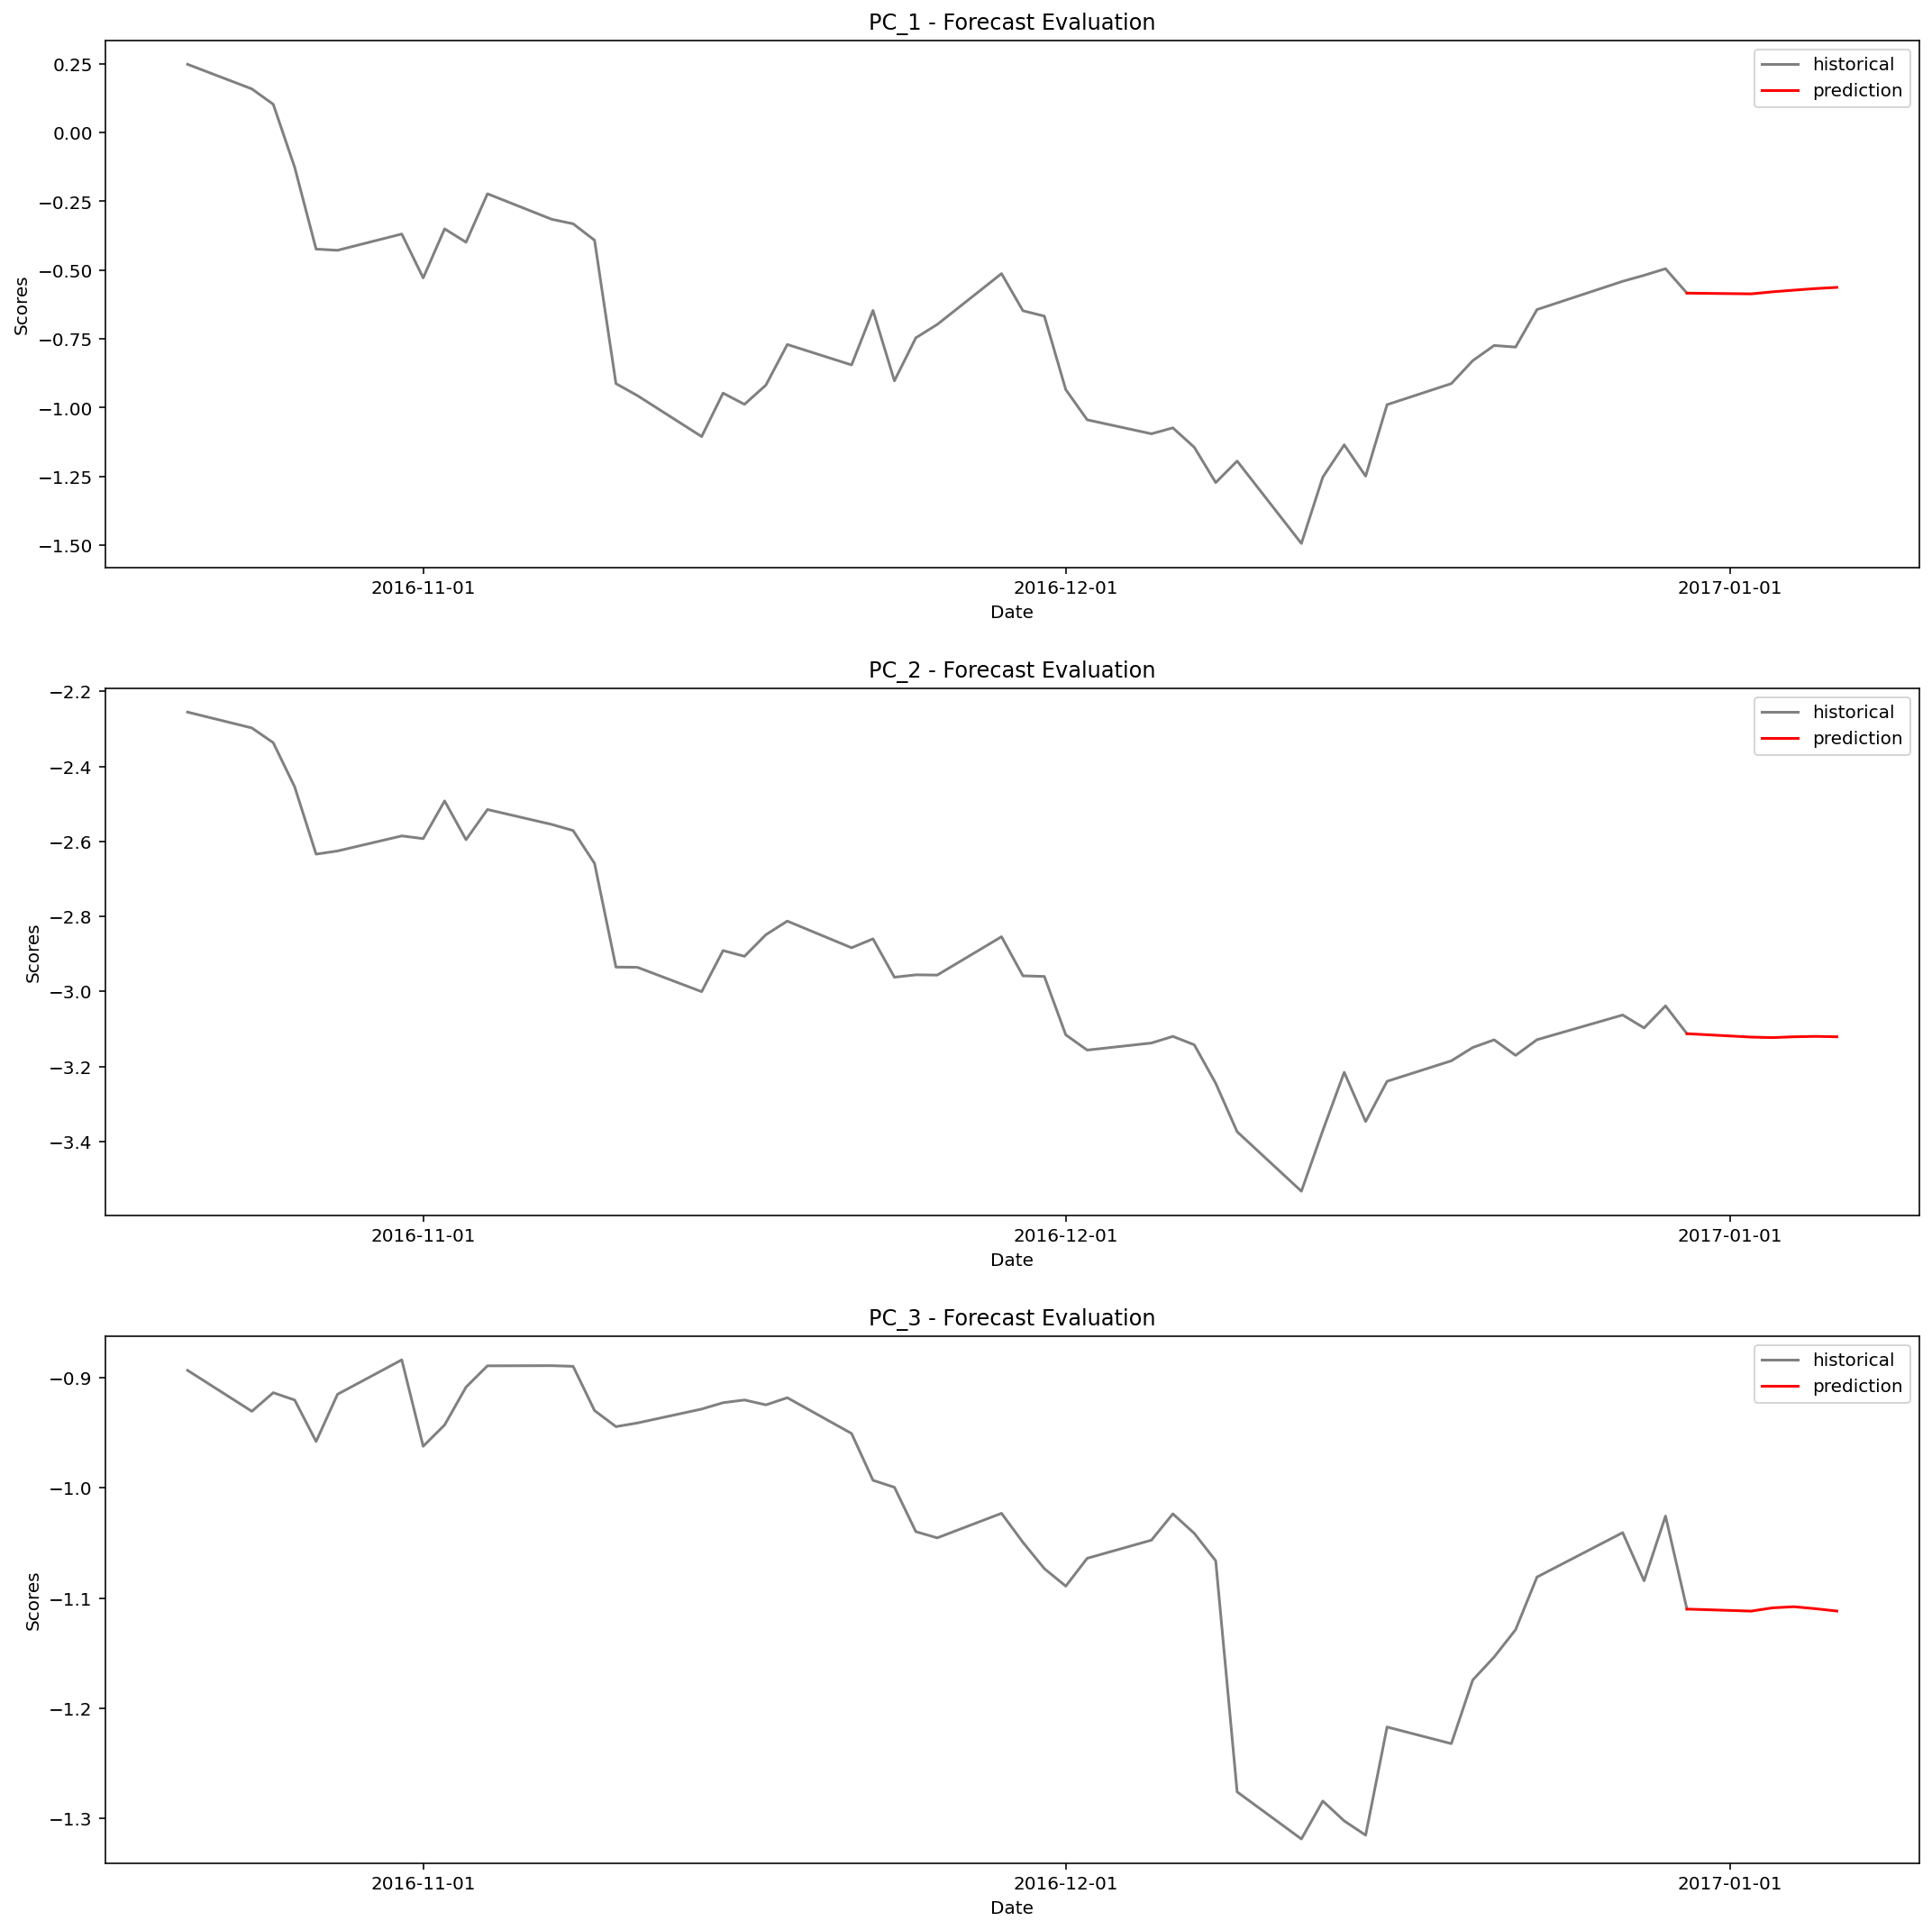

In [48]:
days_hist = 50

fig, ax = plt.subplots(cols_len, 1, figsize = (15,5*cols_len))

chart_hist = train.iloc[-days_hist:,:]
chart_pred = pd.concat([train.iloc[-1:], pred_scores], axis =0)

for i,j in enumerate (cols):
    # Plots --------------------------------------------------------------
    ax[i].plot (chart_hist[j], c="grey", label = "historical")
    ax[i].plot (chart_pred[j], c="red", label = "prediction")

    # Format -------------------------------------------------------------
    ax[i].set_title (j+" - Forecast Evaluation")
    ax[i].set_xlabel ("Date")
    ax[i].set_ylabel ("Scores")

    ax[i].xaxis.set_major_formatter(days_fmt)
    ax[i].xaxis.set_major_locator(months)
    ax[i].legend()

plt.tight_layout(h_pad=2.0)
plt.show()

#### 9.2 Spot Rates

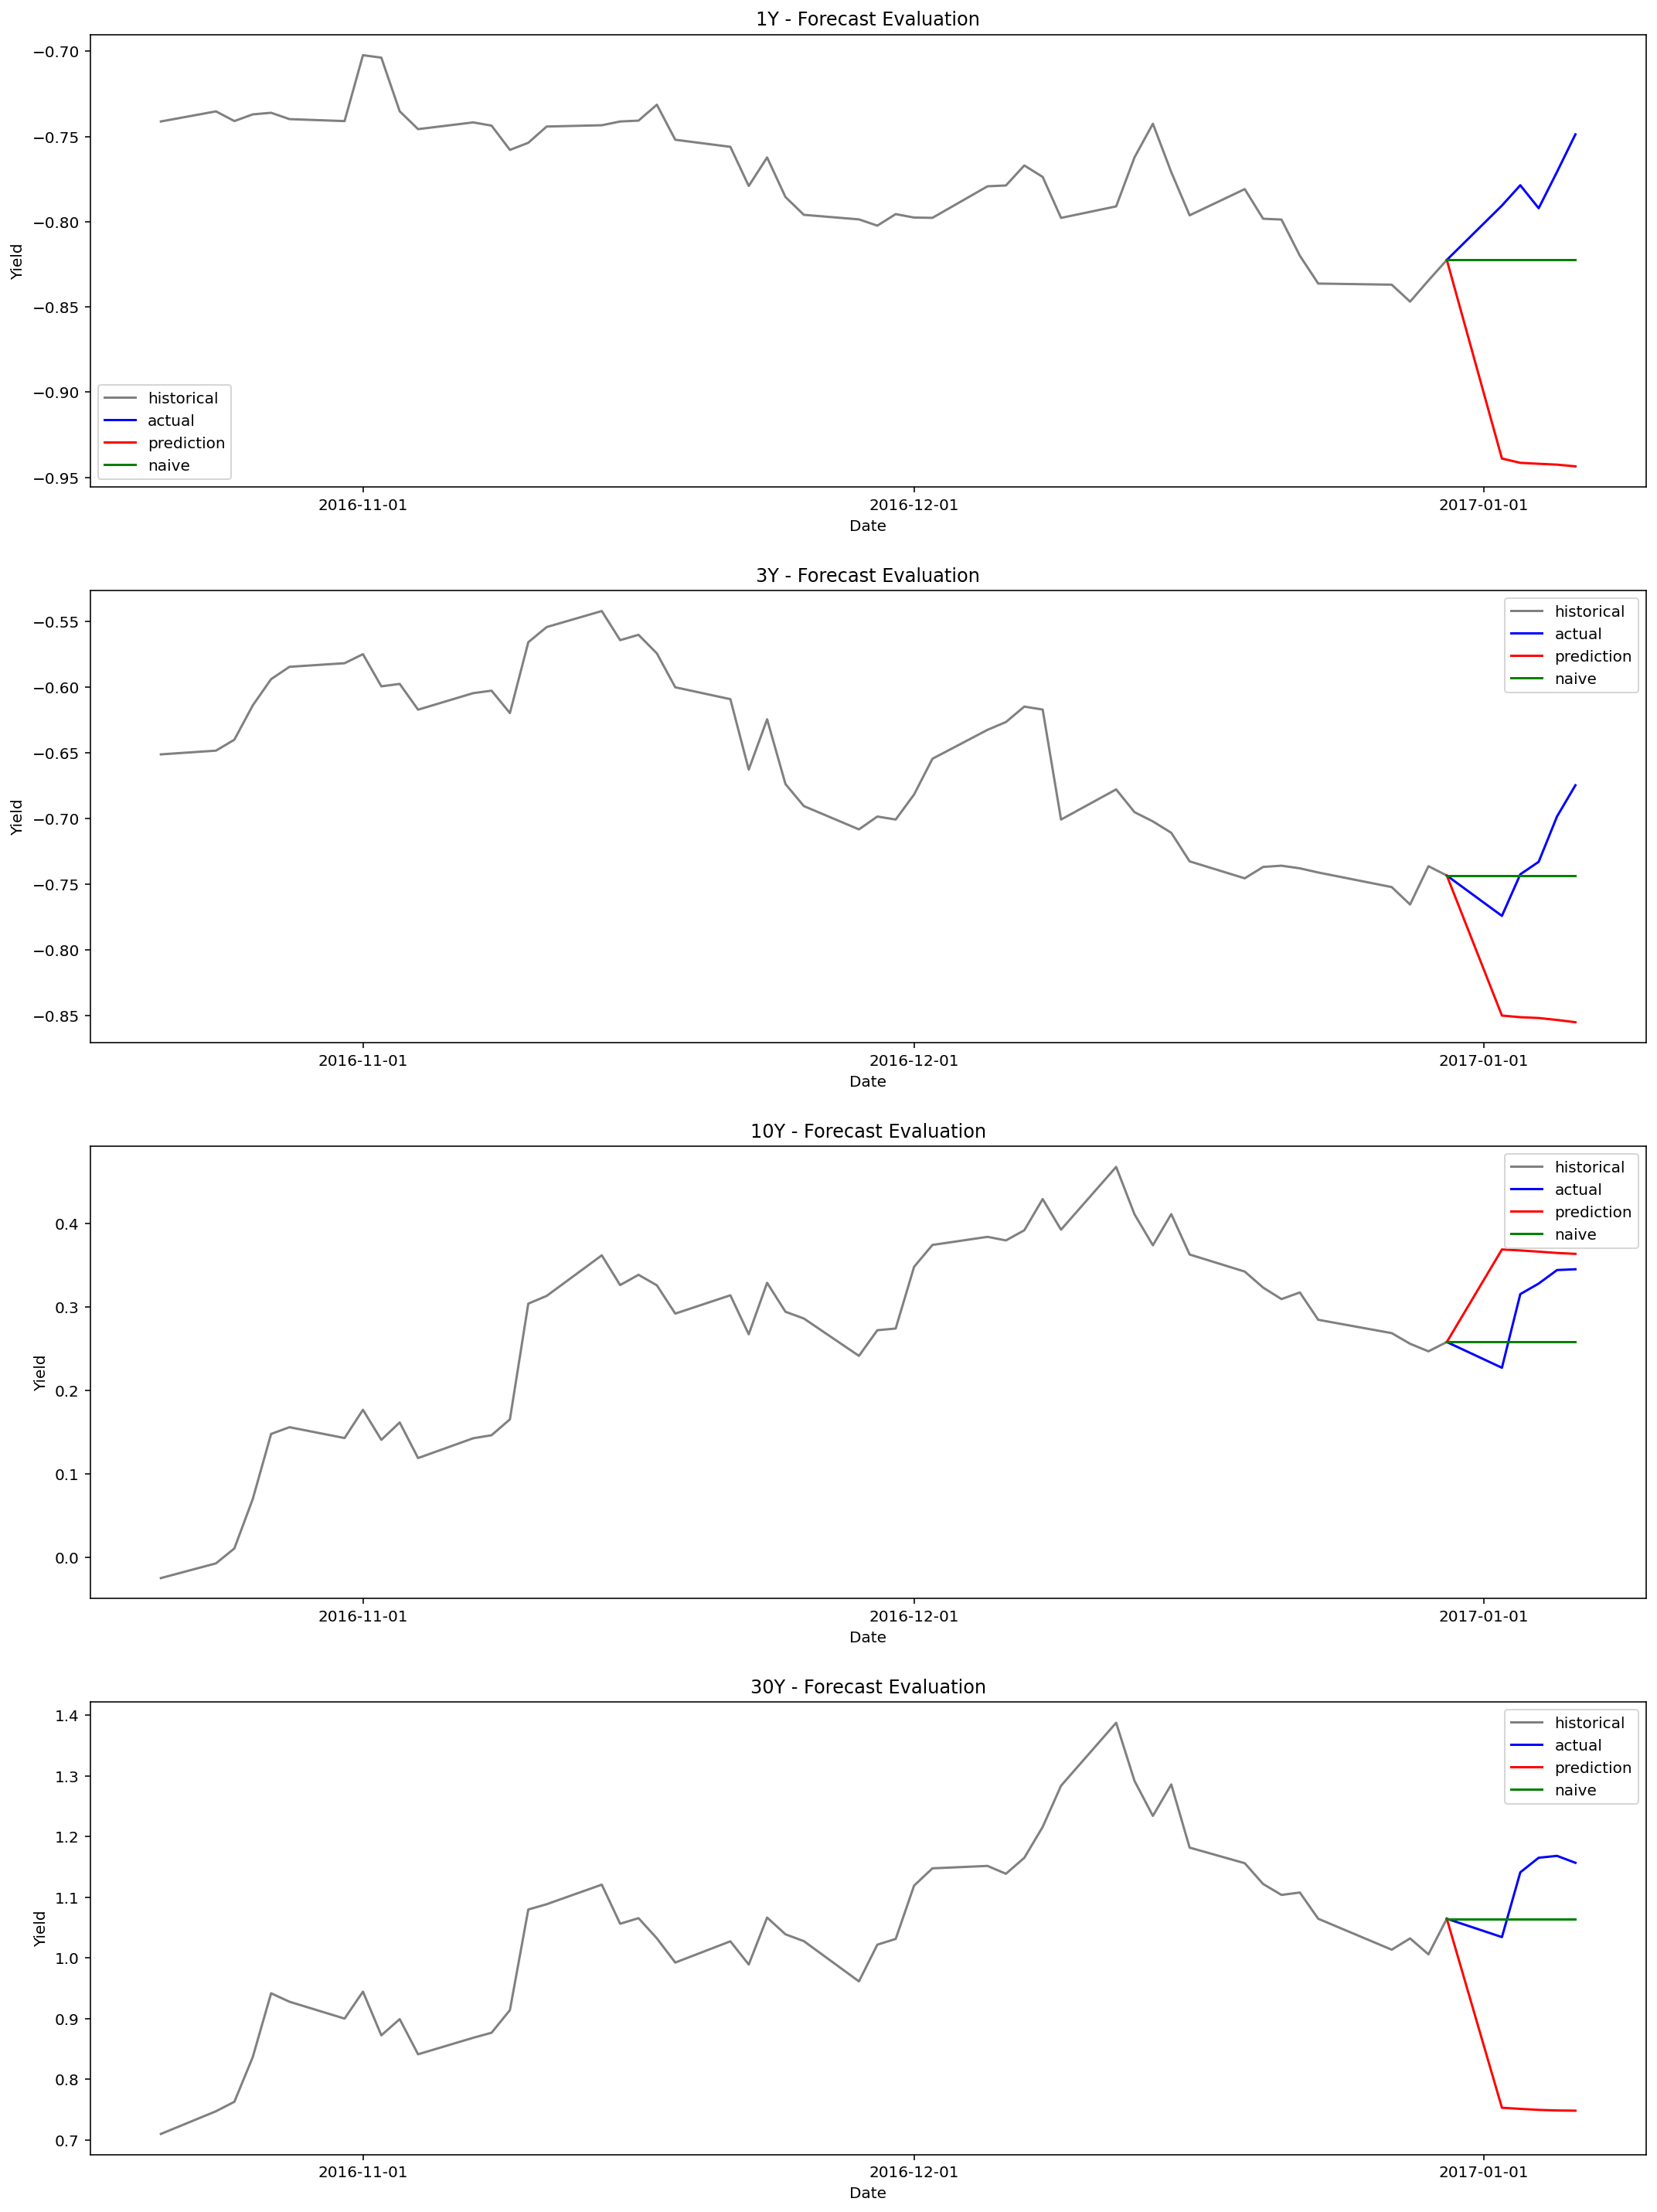

In [49]:
maturities = ["1Y","3Y","10Y","30Y"]

fig, ax = plt.subplots(len(maturities), 1, figsize = (15,5*len(maturities)))

chart_hist = spot_train.iloc[-days_hist:,:]
chart_act = pd.concat([spot_train.iloc[-1:],spot_test.iloc[:steps]], axis = 0)
chart_naive = pd.concat([spot_train.iloc[-1:],naive], axis = 0)
chart_pred = pd.concat([spot_train.iloc[-1:],pred_spot], axis = 0)

for i,j in enumerate(maturities):
    ax[i].plot (chart_hist[j], c="grey", label = "historical")
    ax[i].plot (chart_act[j][:steps+1], c="blue", label = "actual")
    ax[i].plot (chart_pred[j], c="red", label = "prediction")
    ax[i].plot (chart_naive[j], c="green", label = "naive")

    ax[i].set_title (j+" - Forecast Evaluation")
    ax[i].set_xlabel ("Date")
    ax[i].set_ylabel ("Yield")

    ax[i].xaxis.set_major_formatter(days_fmt)
    ax[i].xaxis.set_major_locator(months)
    ax[i].legend()

plt.tight_layout(h_pad=2.0)
plt.show()

C:\Users\bernh\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


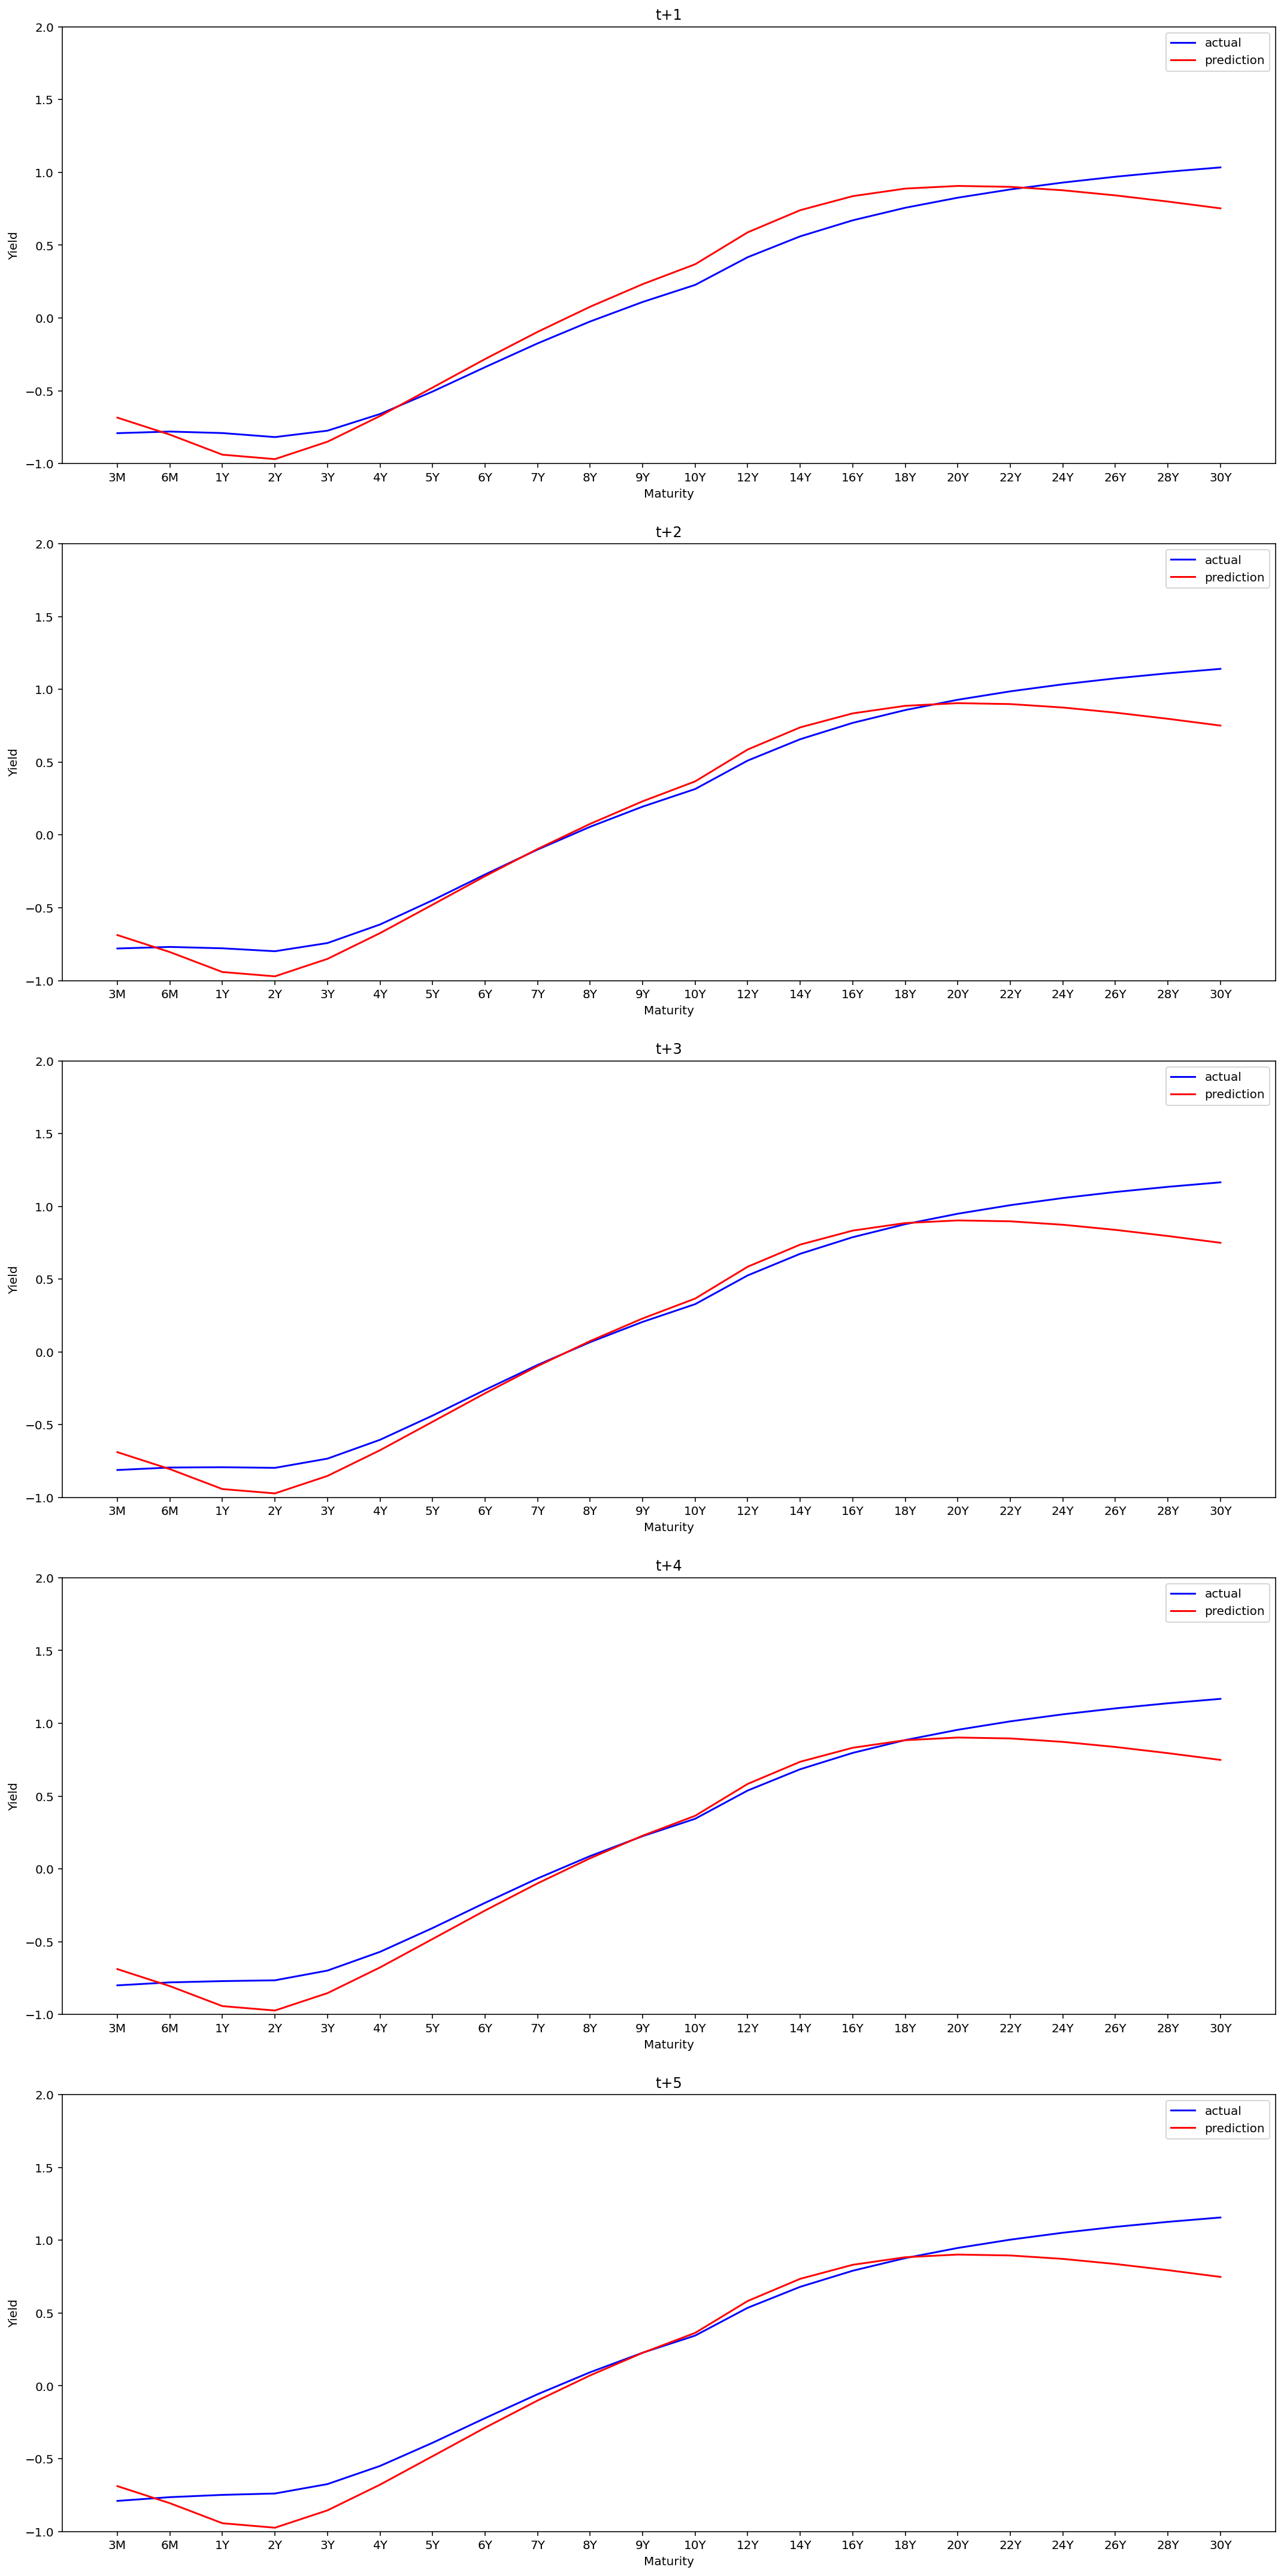

In [50]:
# Helper variables
ymin = np.floor(spot_test.iloc[:steps,:].min().min())
ymax = np.ceil(spot_test.iloc[:steps,:].max().max())
length = pred_spot.shape[0]


fig, ax = plt.subplots(length, 1, figsize = (15,length*6))

for i in range (length):
    # Plot
    ax[i].plot (spot_test.iloc[i,:], c="blue", label = "actual")
    ax[i].plot (pred_spot.iloc[i,:], c="red", label = "prediction")

    # Format
    ax[i].set_title (f't+{i+1}')
    ax[i].set_xlabel ("Maturity")
    ax[i].set_ylabel ("Yield")
    ax[i].set_ylim(ymin,ymax)

    ax[i].set_xticklabels(spot_test.columns)
    ax[i].legend()

    
plt.tight_layout(h_pad=2.0)
plt.show()